In [4]:
# 필요한 라이브러리 
from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)

font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.1
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.2


In [8]:
# 데이터 재로드
data_sanji = pd.read_csv("C:/Users/medici/Team_Pro/syrup/TRAIN_산지공판장_2018-2021.csv")
data_domestic = pd.read_csv("C:/Users/medici/Team_Pro/syrup/TRAIN_전국도매_2018-2021.csv")

In [9]:
# 날짜 형식 변환 함수 정의
def convert_date_format(date_str):
    year_month = date_str[:6]
    period = date_str[6:]
    month_start_date = datetime.strptime(year_month, '%Y%m')
    
    if '상순' in period:
        return month_start_date.replace(day=1).strftime('%Y-%m-%d')
    elif '중순' in period:
        return month_start_date.replace(day=11).strftime('%Y-%m-%d')
    elif '하순' in period:
        return month_start_date.replace(day=21).strftime('%Y-%m-%d')
    else:
        return date_str

# 날짜 형식 변환 적용
data_sanji['시점'] = data_sanji['시점'].apply(convert_date_format)
data_domestic['시점'] = data_domestic['시점'].apply(convert_date_format)

# 두 데이터셋 병합: 시점, 품목명, 품종명을 기준으로 병합
merged_data = pd.merge(
    data_sanji, data_domestic,
    on=['시점', '품목명', '품종명'],
    how='inner',
    suffixes=('_산지', '_도매'))

In [10]:
# 두 데이터셋 병합: 시점, 품목명, 품종명을 기준으로 병합
merged_data = pd.merge(
    data_sanji, data_domestic,
    on=['시점', '품목명', '품종명'],
    how='inner',
    suffixes=('_산지', '_도매')
)

In [11]:
merged_data.to_csv('merged_data.csv', index=False)

print("병합된 데이터가 'merged_data.csv' 파일로 저장되었습니다.")

병합된 데이터가 'merged_data.csv' 파일로 저장되었습니다.


In [5]:
df = pd.read_csv('C:/Users/medici/Team_Pro/syrup/merged_data.csv')

In [14]:
df.columns

Index(['시점', '공판장코드', '공판장명', '품목코드_산지', '품목명', '품종코드_산지', '품종명', '등급코드',
       '등급명', '총반입량(kg)_산지', '총거래금액(원)_산지', '평균가(원/kg)_산지', '중간가(원/kg)_산지',
       '최저가(원/kg)_산지', '최고가(원/kg)_산지', '경매 건수_산지',
       '전순 평균가격(원) PreVious SOON_산지', '전달 평균가격(원) PreVious MMonth_산지',
       '전년 평균가격(원) PreVious YeaR_산지', '평년 평균가격(원) Common Year SOON_산지',
       '연도_산지', '시장코드', '시장명', '품목코드_도매', '품종코드_도매', '총반입량(kg)_도매',
       '총거래금액(원)_도매', '평균가(원/kg)_도매', '고가(20%) 평균가', '중가(60%) 평균가 ',
       '저가(20%) 평균가', '중간가(원/kg)_도매', '최저가(원/kg)_도매', '최고가(원/kg)_도매',
       '경매 건수_도매', '전순 평균가격(원) PreVious SOON_도매',
       '전달 평균가격(원) PreVious MMonth_도매', '전년 평균가격(원) PreVious YeaR_도매',
       '평년 평균가격(원) Common Year SOON_도매', '연도_도매'],
      dtype='object')

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933998 entries, 0 to 2933997
Data columns (total 40 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   시점                              object 
 1   공판장코드                           int64  
 2   공판장명                            object 
 3   품목코드_산지                         int64  
 4   품목명                             object 
 5   품종코드_산지                         int64  
 6   품종명                             object 
 7   등급코드                            int64  
 8   등급명                             object 
 9   총반입량(kg)_산지                     float64
 10  총거래금액(원)_산지                     int64  
 11  평균가(원/kg)_산지                    float64
 12  중간가(원/kg)_산지                    float64
 13  최저가(원/kg)_산지                    float64
 14  최고가(원/kg)_산지                    float64
 15  경매 건수_산지                        int64  
 16  전순 평균가격(원) PreVious SOON_산지     float64
 17  전달 평균가격(원) PreVious MMonth_

In [20]:
df.isna

<bound method DataFrame.isna of                  시점       공판장코드         공판장명  품목코드_산지 품목명  품종코드_산지   품종명  \
0        2018-01-01  1000000000     *전국농협공판장      501  감자    50101    수미   
1        2018-01-01  1000000000     *전국농협공판장      501  감자    50101    수미   
2        2018-01-01  1000000000     *전국농협공판장      501  감자    50101    수미   
3        2018-01-01  1000000000     *전국농협공판장      501  감자    50101    수미   
4        2018-01-01  1000000000     *전국농협공판장      501  감자    50101    수미   
...             ...         ...          ...      ...  ..      ...   ...   
2933993  2021-12-21  6198201338  삼천포농협농산물공판장      601  사과    60199  기타사과   
2933994  2021-12-21  6198201338  삼천포농협농산물공판장      601  사과    60199  기타사과   
2933995  2021-12-21  6198201338  삼천포농협농산물공판장      601  사과    60199  기타사과   
2933996  2021-12-21  6198201338  삼천포농협농산물공판장      601  사과    60199  기타사과   
2933997  2021-12-21  6198201338  삼천포농협농산물공판장      601  사과    60199  기타사과   

         등급코드 등급명  총반입량(kg)_산지  ...  저가(20%) 평균가  중간가(원

In [26]:
df2 = df.drop(['시점','공판장명', '품목명', '품종명', '등급명', '시장명', ],axis=1)

                                   공판장코드   품목코드_산지   품종코드_산지      등급코드  \
공판장코드                           1.000000 -0.044746 -0.044605 -0.062877   
품목코드_산지                        -0.044746  1.000000  0.999999 -0.249908   
품종코드_산지                        -0.044605  0.999999  1.000000 -0.249881   
등급코드                           -0.062877 -0.249908 -0.249881  1.000000   
총반입량(kg)_산지                    -0.124931  0.013463  0.013462 -0.051175   
총거래금액(원)_산지                    -0.079640 -0.029770 -0.029828 -0.032189   
평균가(원/kg)_산지                    0.000349  0.012210  0.012185 -0.008132   
중간가(원/kg)_산지                    0.000672  0.013227  0.013203 -0.008693   
최저가(원/kg)_산지                    0.002165  0.011812  0.011790 -0.005950   
최고가(원/kg)_산지                   -0.002766  0.015895  0.015870 -0.012637   
경매 건수_산지                        0.098332 -0.057894 -0.058032 -0.066399   
전순 평균가격(원) PreVious SOON_산지    -0.005639  0.013212  0.013183 -0.012132   
전달 평균가격(원) PreVious MMonth_산지  -0.0072

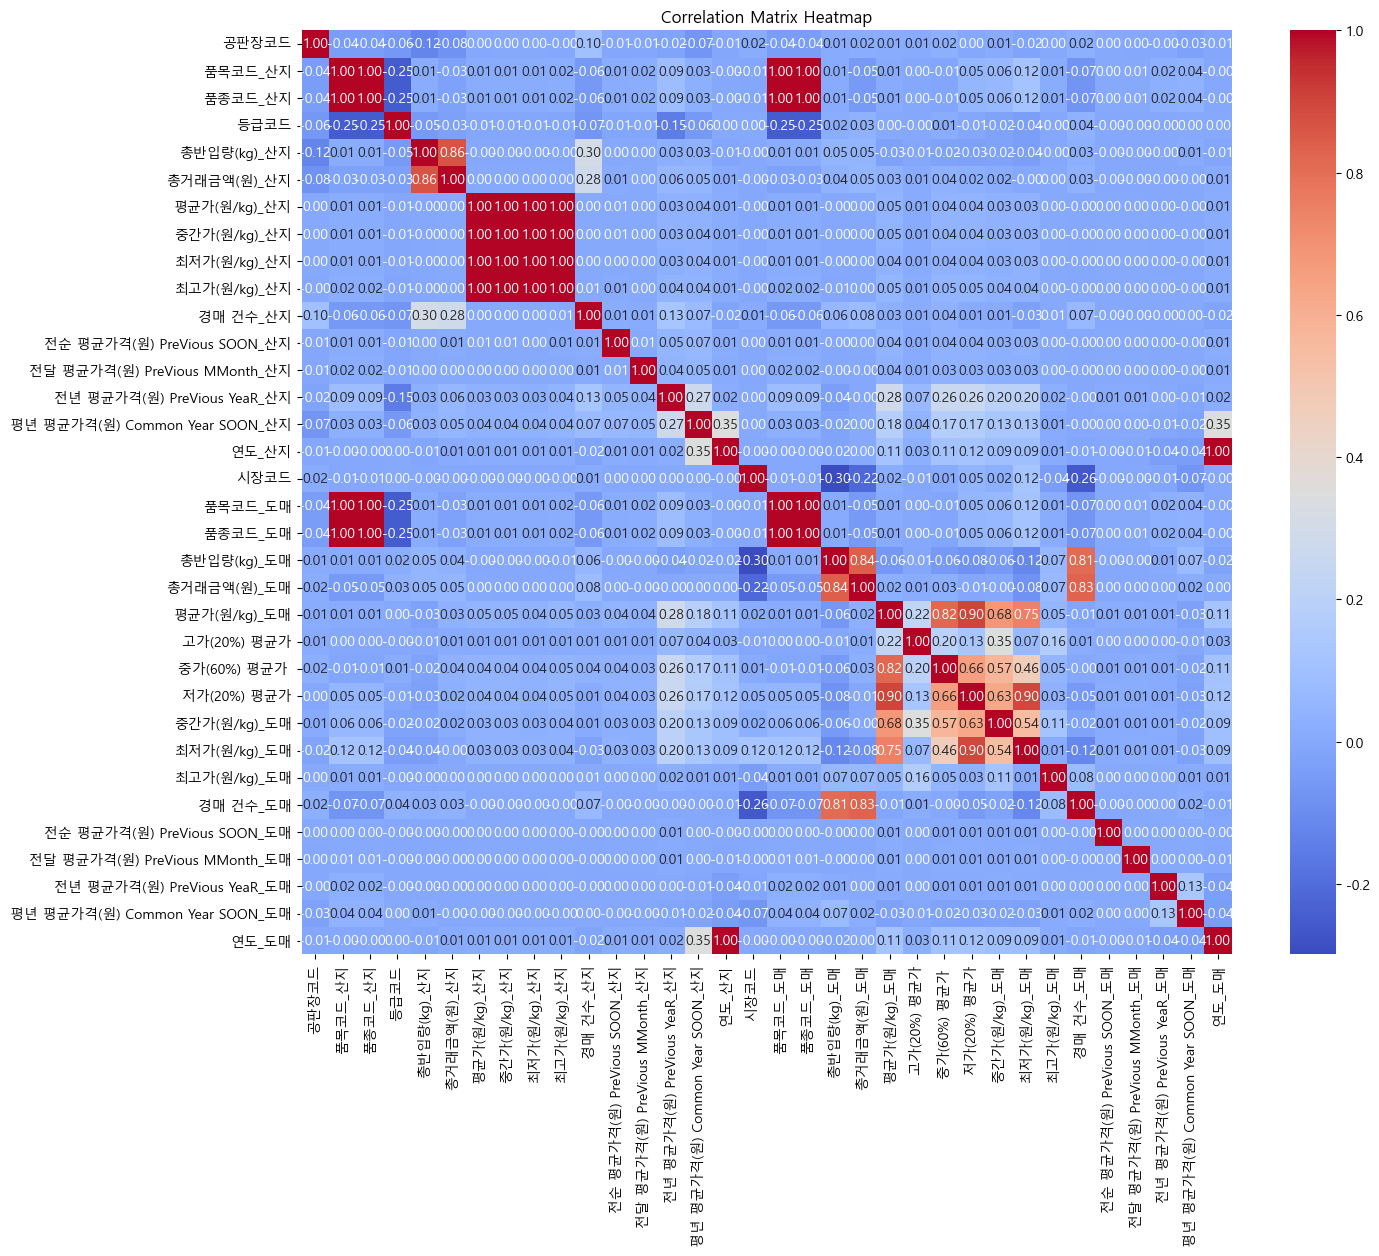

In [28]:
corr_df = df2.corr()

# 상관행렬 출력
print(corr_df)

# 상관행렬을 히트맵으로 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
"""중복되는 일부 범주형 데이터를 데이터프레임에서 제외하고, 상관행렬 실시.
    실시결과, 공판장 데이터셋보다는 도매시장 데이터셋의 상관행렬에 계수가 높은 것을 확인함.
    다양한 피쳐를 활용해야하므로, 공판장 데이터셋의 고가, 중가, 저가를 추가하는 방향을 제시.
    해당 피쳐을에 대한 기준을 평균? 최저? 등 기준에 대한 토의 필요."""

'중복되는 일부 범주형 데이터를 데이터프레임에서 제외하고, 상관행렬 실시.\n    실시결과, 공판장 데이터셋보다는 도매시장 데이터셋의 상관행렬에 계수가 높은 것을 확인함.\n    다양한 피쳐를 활용해야하므로, 공판장 데이터셋의 고가, 중가, 저가를 추가하는 방향을 제시.\n    해당 피쳐을에 대한 기준을 평균? 최저? 등 기준에 대한 토의 필요.'

In [43]:
# 품종에 제시된 농작물에 대해서 파악
df['품목명'].unique()

array(['감자', '사과', '배', '배추', '상추', '무', '양파', '대파', '마늘', '순무'],
      dtype=object)

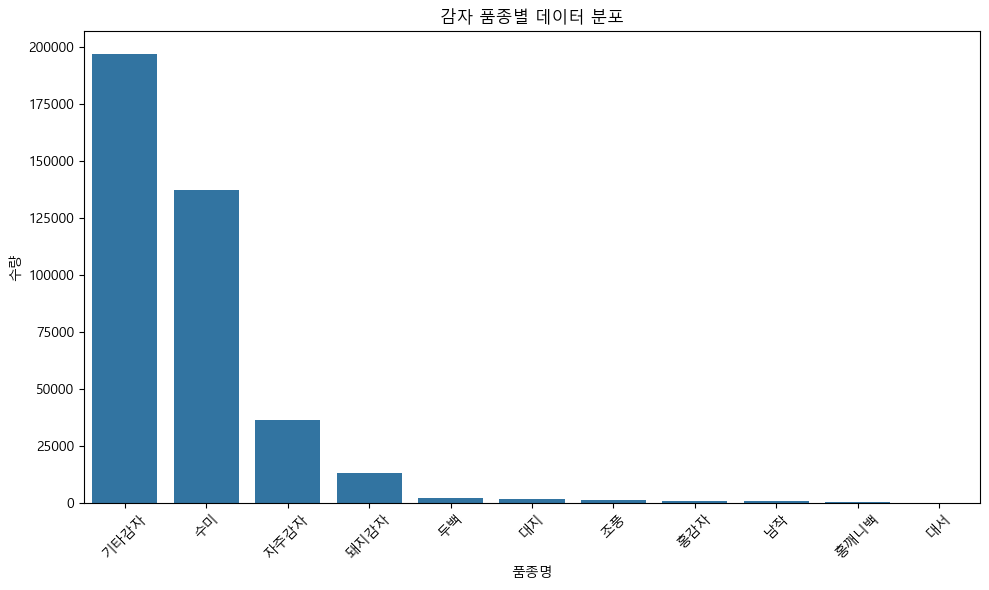

In [31]:
# 감자에 대한 품종 시각화를 실시
potato_data = df[df['품목명'] == '감자']

# 품종별 데이터 카운트 또는 특정 수치에 따른 시각화 (예: 평균 가격)
plt.figure(figsize=(10, 6))
sns.countplot(data=potato_data, x='품종명', order=potato_data['품종명'].value_counts().index)
plt.xticks(rotation=45)
plt.title('감자 품종별 데이터 분포')
plt.xlabel('품종명')
plt.ylabel('수량')

# 그래프 표시
plt.tight_layout()
plt.show()

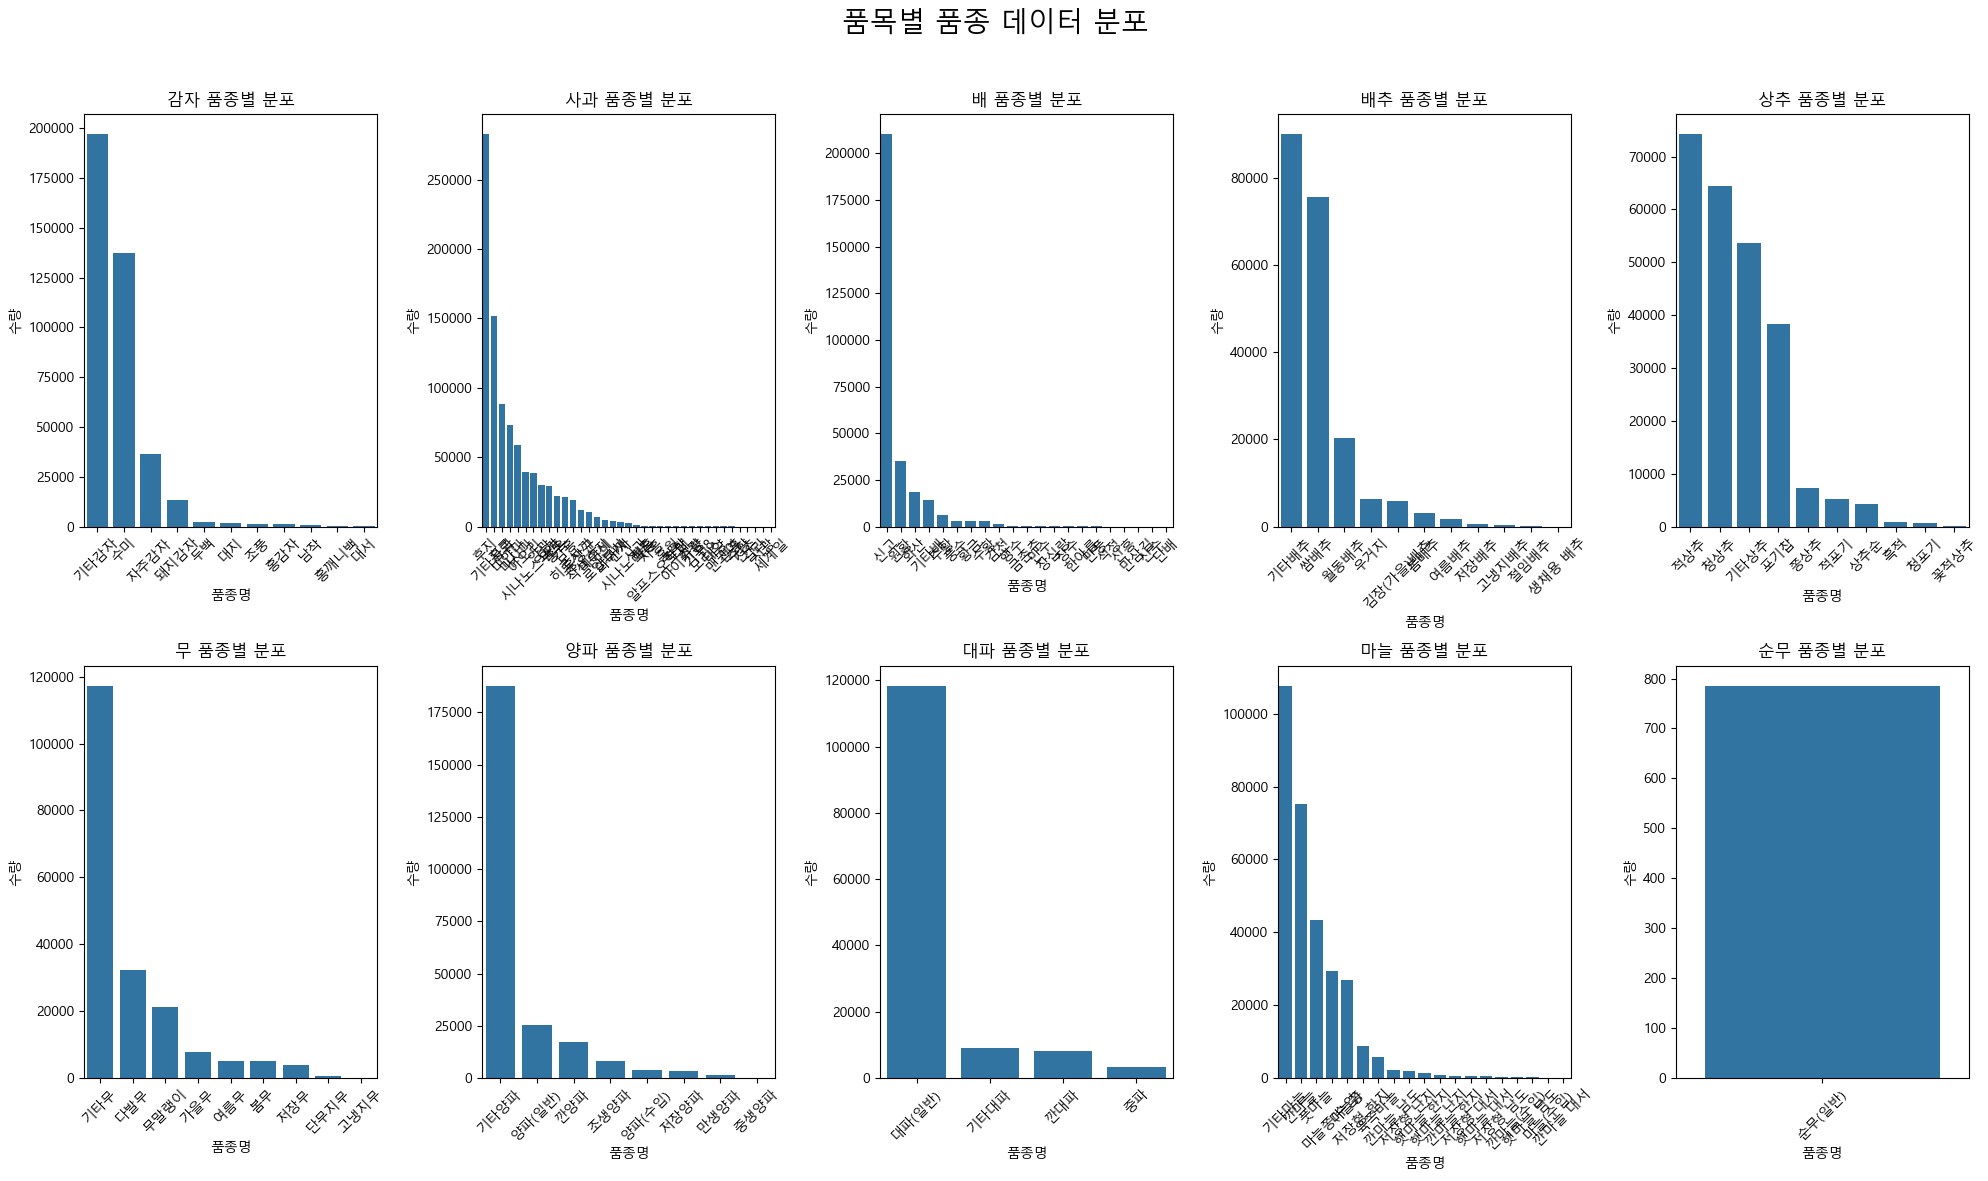

In [41]:
items = ['감자', '사과', '배', '배추', '상추', '무', '양파', '대파', '마늘', '순무']

# 서브플롯을 위한 행과 열 설정 (2행 5열)
fig, axes = plt.subplots(2, 5, figsize=(20, 12))
fig.suptitle('품목별 품종 데이터 분포', fontsize=20)

# 각 품목에 대해 시각화
for i, item in enumerate(items):
    row = i // 5  # 행 위치
    col = i % 5   # 열 위치
    item_data = df[df['품목명'] == item]
    
    # 품종별 데이터 카운트 시각화
    sns.countplot(data=item_data, x='품종명', order=item_data['품종명'].value_counts().index, ax=axes[row, col])
    axes[row, col].set_title(f'{item} 품종별 분포')
    axes[row, col].set_xlabel('품종명')
    axes[row, col].set_ylabel('수량')
    axes[row, col].tick_params(axis='x', rotation=45)

# 그래프 간 간격을 자동으로 조정
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


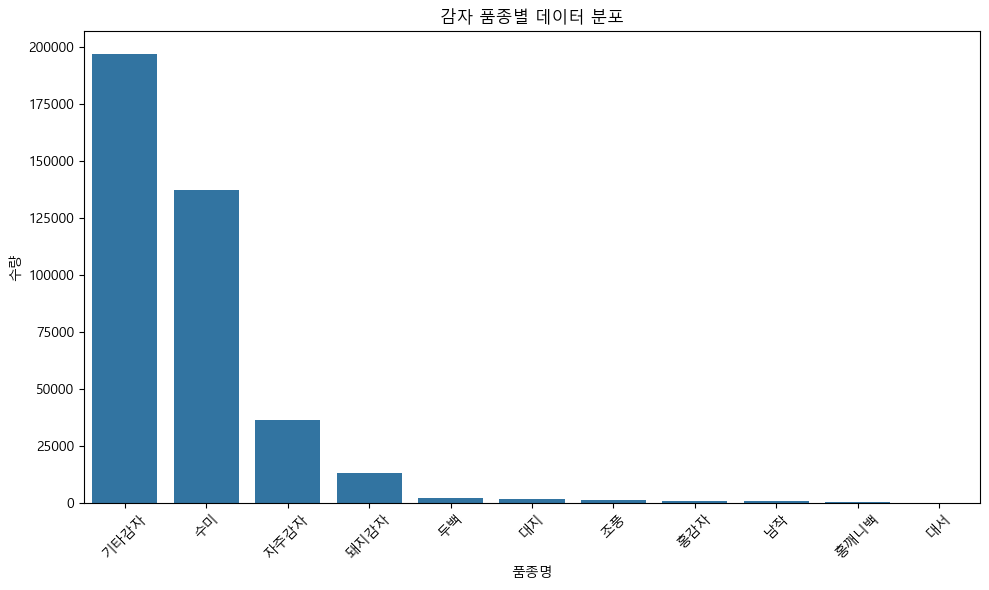

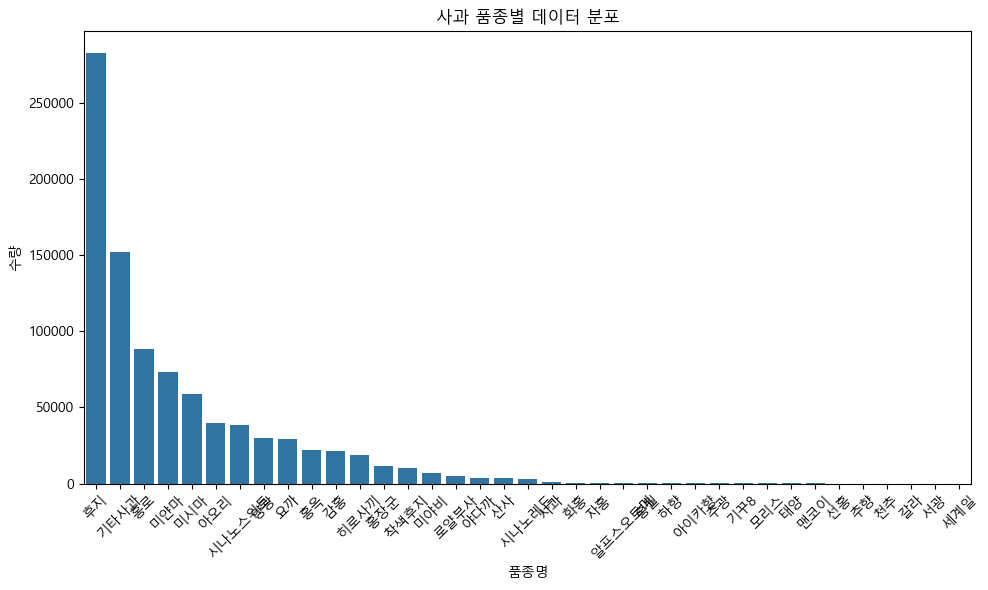

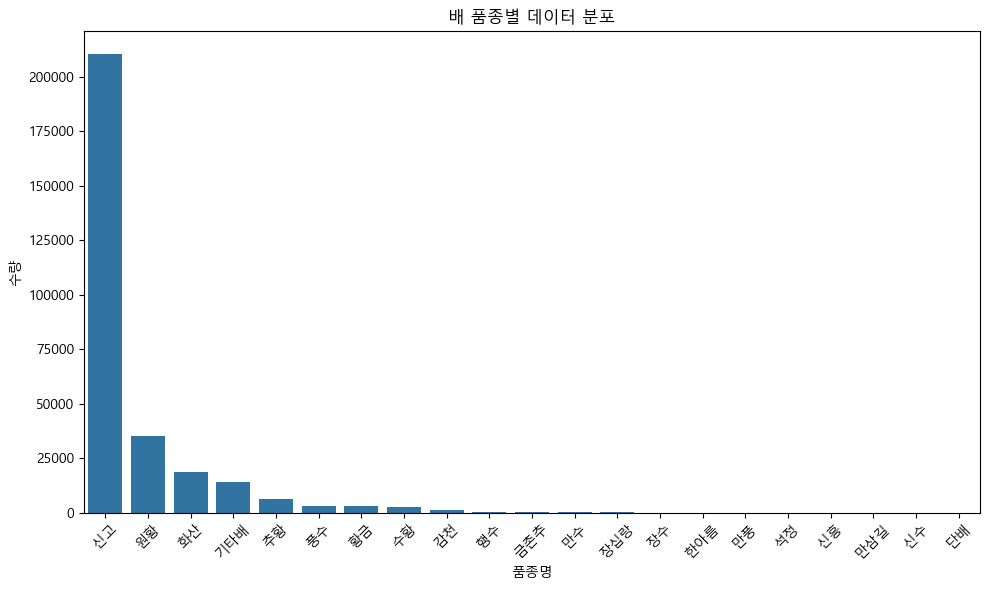

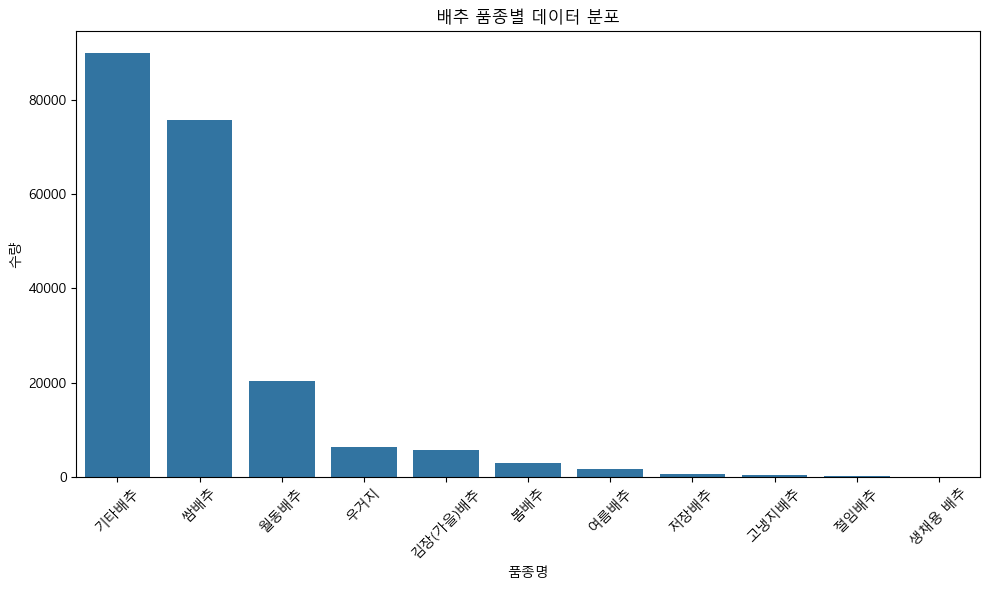

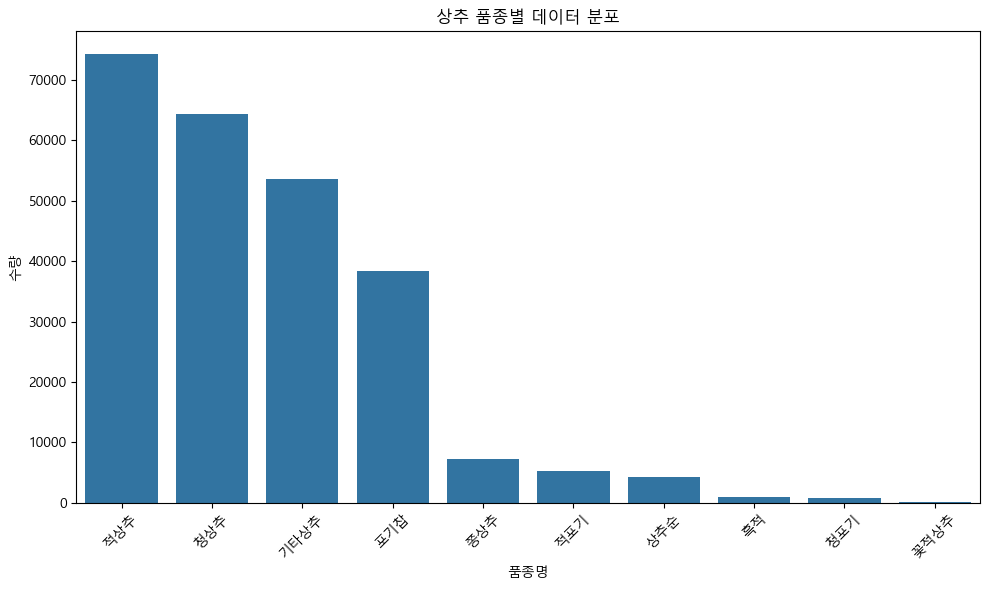

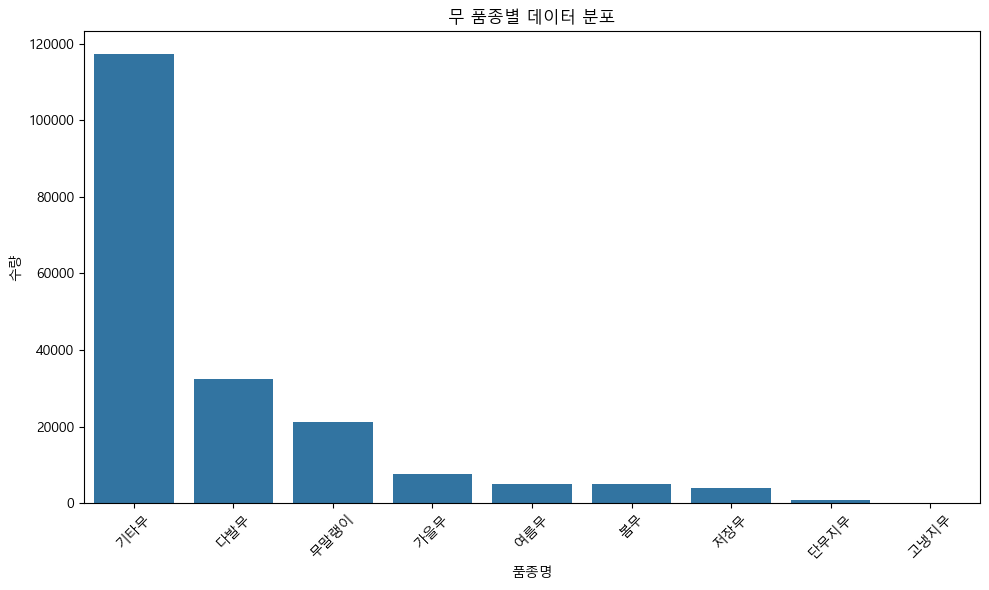

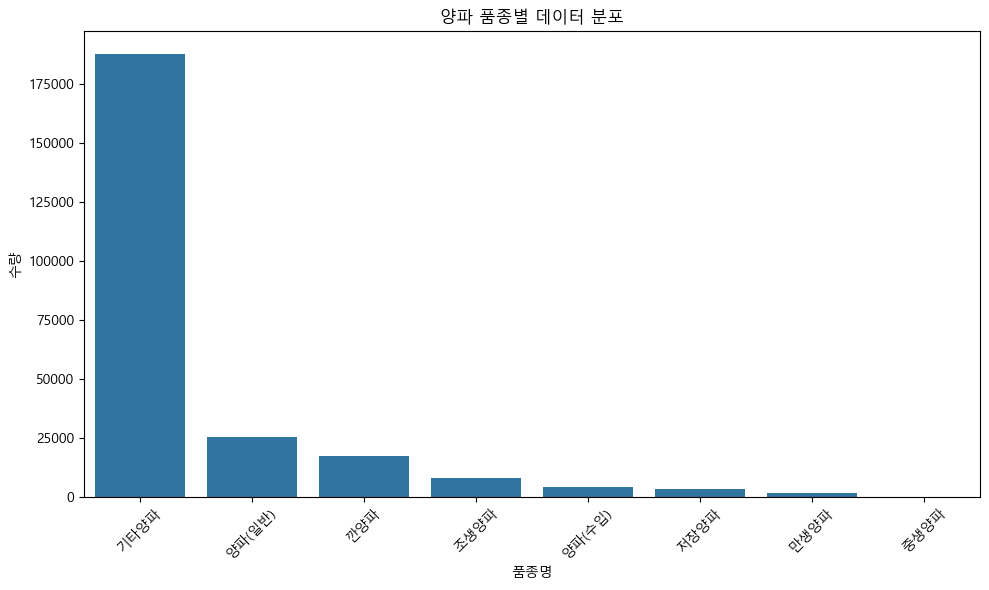

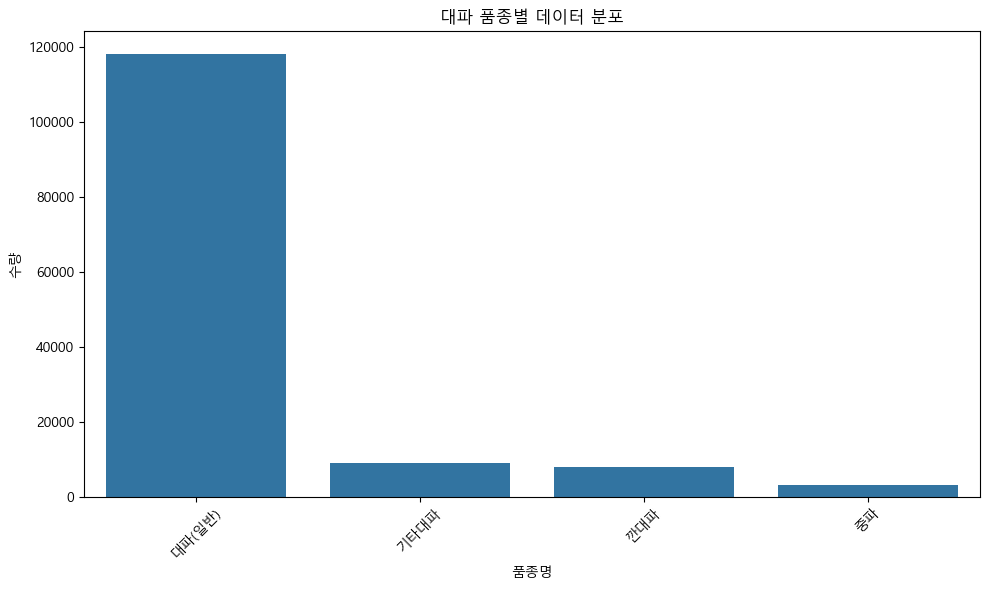

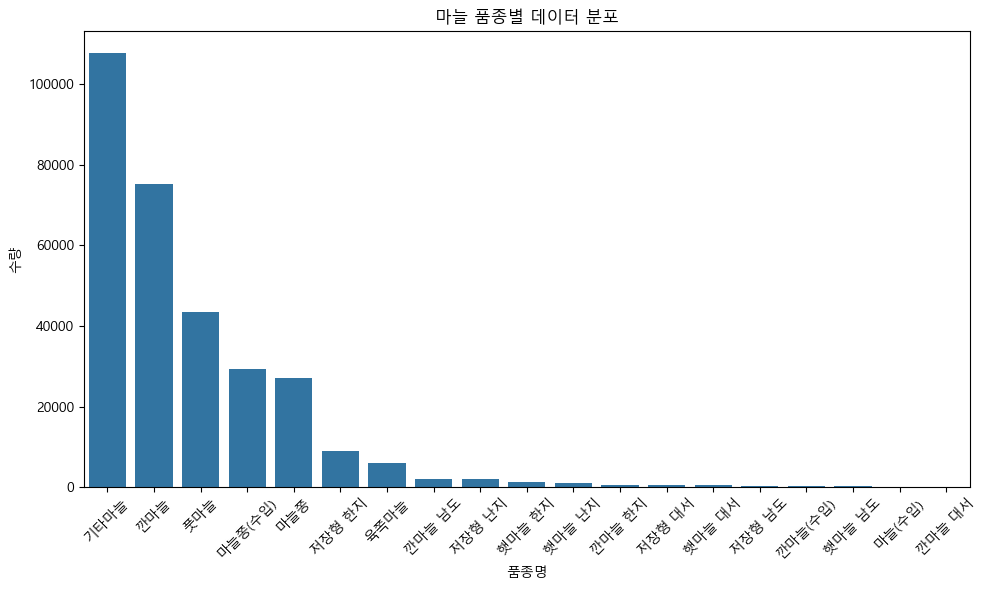

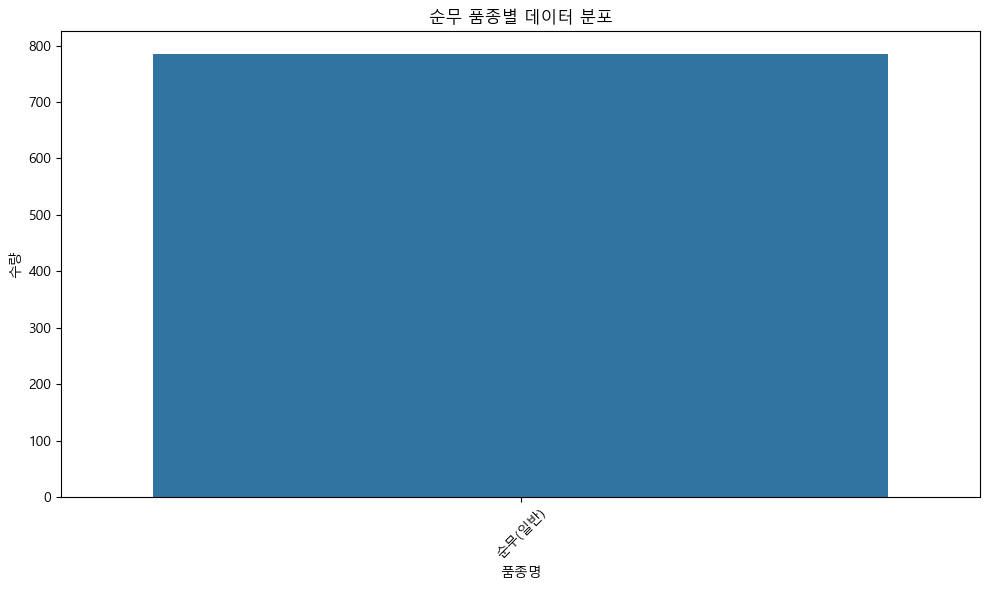

In [44]:
# 개별 시각화 정보 (1개씩 확인) 코드
items = ['감자', '사과', '배', '배추', '상추', '무', '양파', '대파', '마늘', '순무']

for item in items:
    item_data = df[df['품목명'] == item]
    
    # 품종별 데이터 카운트 시각화
    plt.figure(figsize=(10, 6))
    sns.countplot(data=item_data, x='품종명', order=item_data['품종명'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'{item} 품종별 데이터 분포')
    plt.xlabel('품종명')
    plt.ylabel('수량')
    
    # 그래프 표시
    plt.tight_layout()
    plt.show()

In [46]:
df.columns = df.columns.str.replace(' ', '_')

# 수정된 컬럼명 확인
print(df.columns)

Index(['시점', '공판장코드', '공판장명', '품목코드_산지', '품목명', '품종코드_산지', '품종명', '등급코드',
       '등급명', '총반입량(kg)_산지', '총거래금액(원)_산지', '평균가(원/kg)_산지', '중간가(원/kg)_산지',
       '최저가(원/kg)_산지', '최고가(원/kg)_산지', '경매_건수_산지',
       '전순_평균가격(원)_PreVious_SOON_산지', '전달_평균가격(원)_PreVious_MMonth_산지',
       '전년_평균가격(원)_PreVious_YeaR_산지', '평년_평균가격(원)_Common_Year_SOON_산지',
       '연도_산지', '시장코드', '시장명', '품목코드_도매', '품종코드_도매', '총반입량(kg)_도매',
       '총거래금액(원)_도매', '평균가(원/kg)_도매', '고가(20%)_평균가', '중가(60%)_평균가_',
       '저가(20%)_평균가', '중간가(원/kg)_도매', '최저가(원/kg)_도매', '최고가(원/kg)_도매',
       '경매_건수_도매', '전순_평균가격(원)_PreVious_SOON_도매',
       '전달_평균가격(원)_PreVious_MMonth_도매', '전년_평균가격(원)_PreVious_YeaR_도매',
       '평년_평균가격(원)_Common_Year_SOON_도매', '연도_도매'],
      dtype='object')


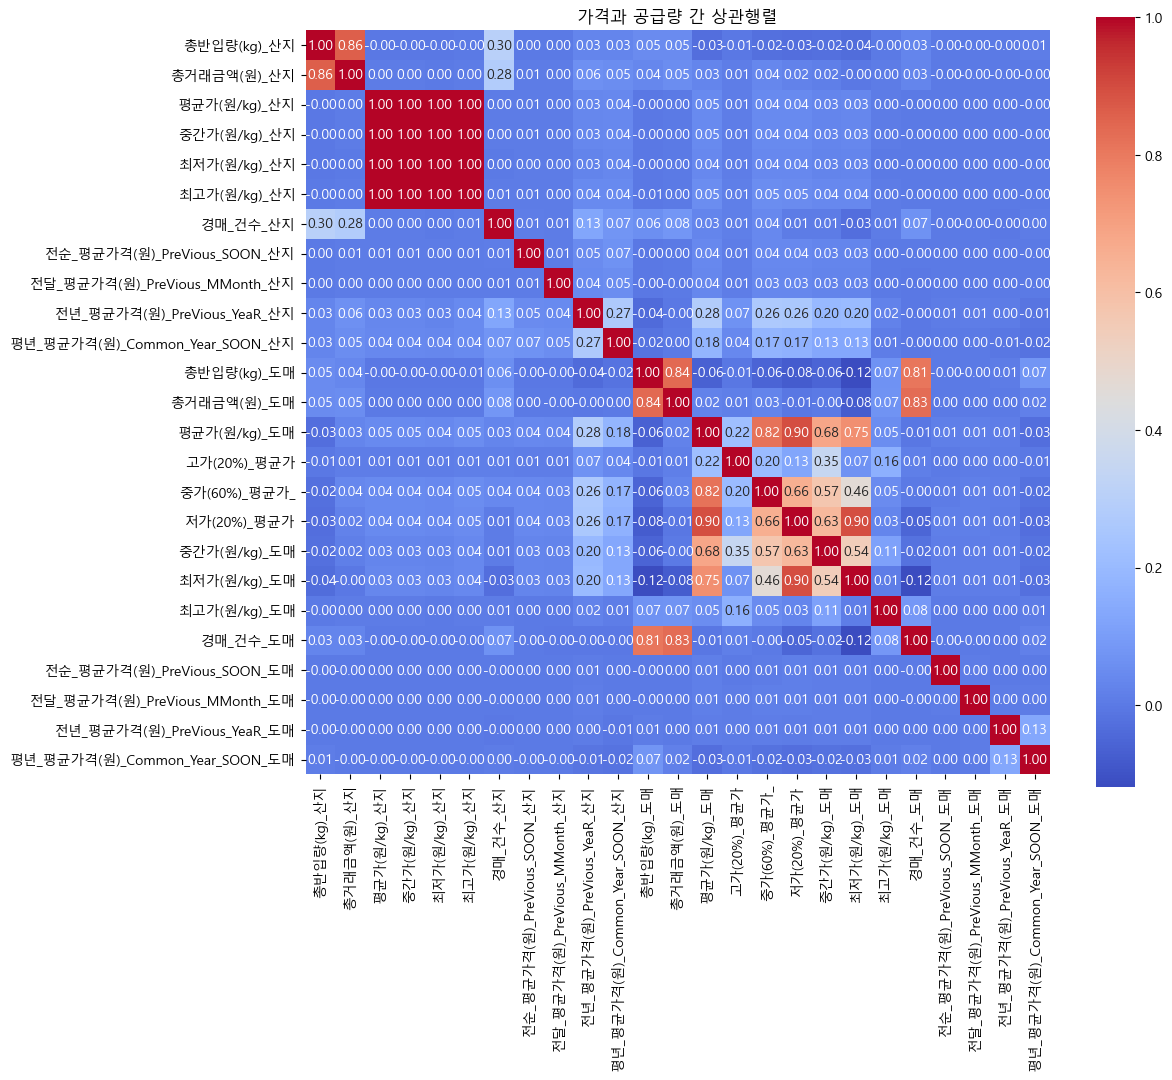

In [48]:
# 공급량과 가격의 상관행렬 확인

price_df = [
    '총반입량(kg)_산지', '총거래금액(원)_산지', '평균가(원/kg)_산지', '중간가(원/kg)_산지',
       '최저가(원/kg)_산지', '최고가(원/kg)_산지', '경매_건수_산지',
       '전순_평균가격(원)_PreVious_SOON_산지', '전달_평균가격(원)_PreVious_MMonth_산지',
       '전년_평균가격(원)_PreVious_YeaR_산지', '평년_평균가격(원)_Common_Year_SOON_산지',
    '총반입량(kg)_도매',
       '총거래금액(원)_도매', '평균가(원/kg)_도매', '고가(20%)_평균가', '중가(60%)_평균가_',
       '저가(20%)_평균가', '중간가(원/kg)_도매', '최저가(원/kg)_도매', '최고가(원/kg)_도매',
       '경매_건수_도매', '전순_평균가격(원)_PreVious_SOON_도매',
       '전달_평균가격(원)_PreVious_MMonth_도매', '전년_평균가격(원)_PreVious_YeaR_도매',
       '평년_평균가격(원)_Common_Year_SOON_도매'
]

# 관심 있는 컬럼으로 데이터프레임 생성
total_price_df = df[price_df]

# 상관행렬 계산
correlation_matrix = total_price_df.corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('가격과 공급량 간 상관행렬')
plt.show()

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


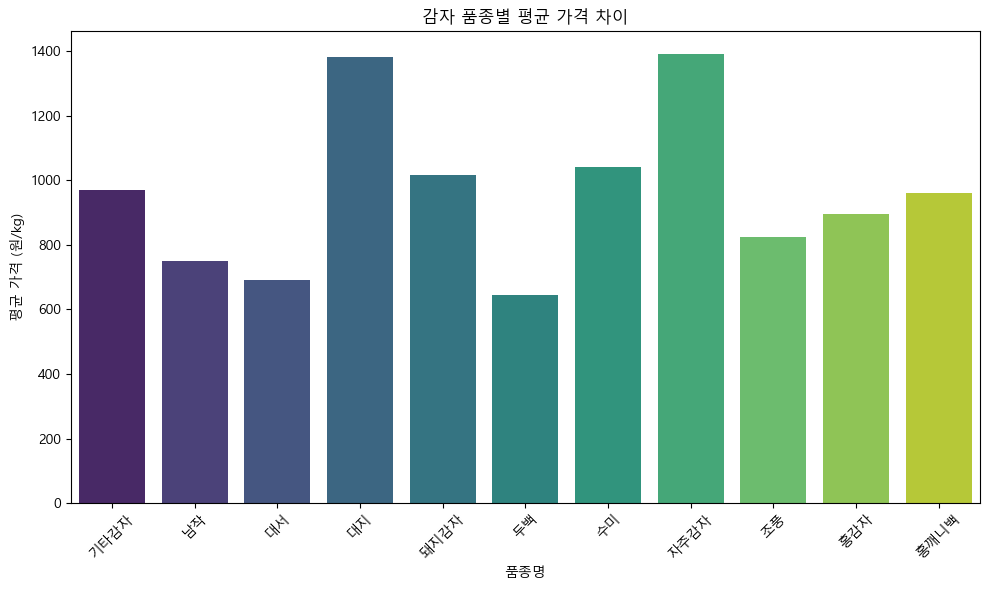

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


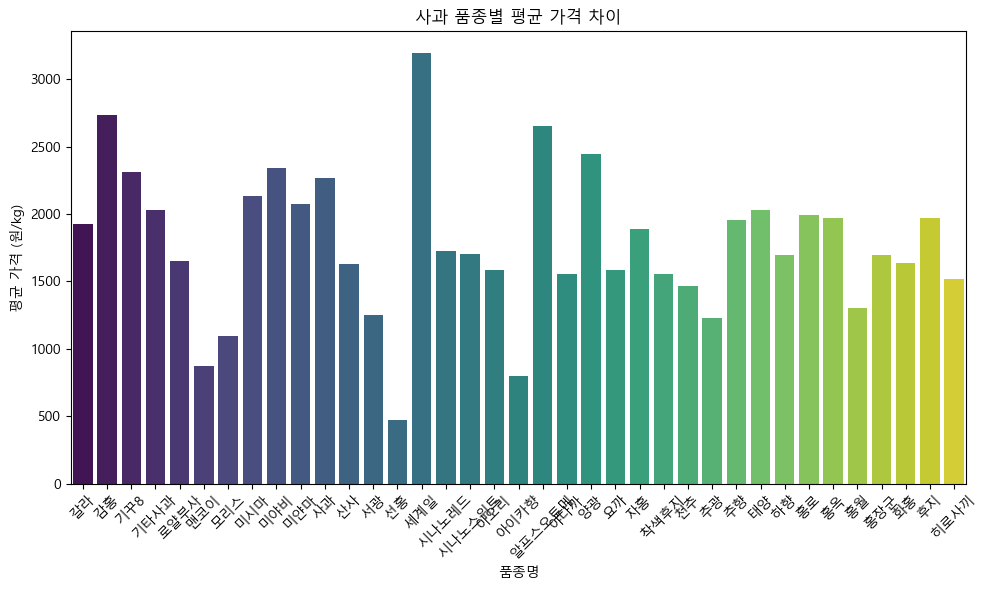

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


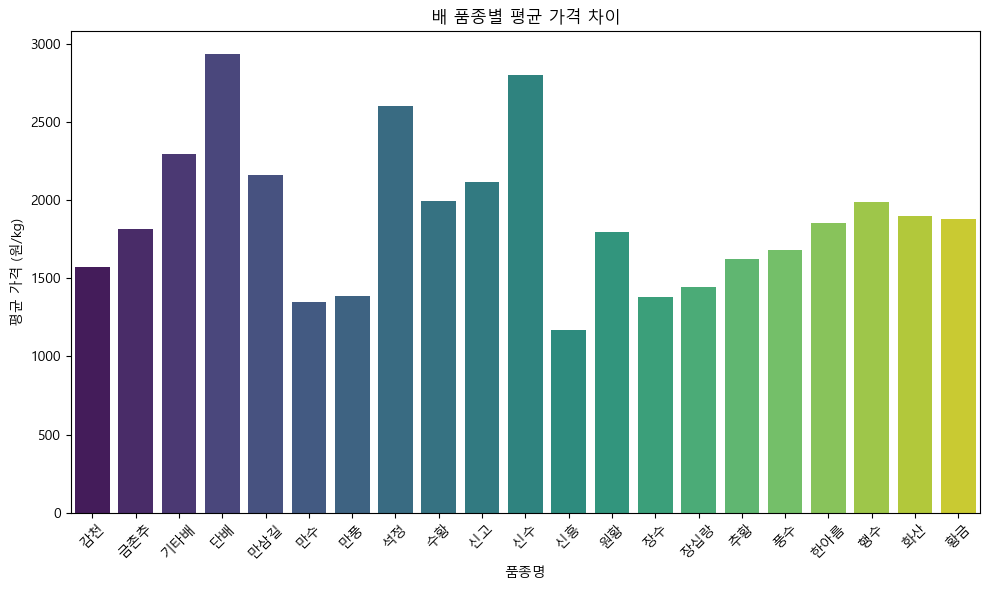

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


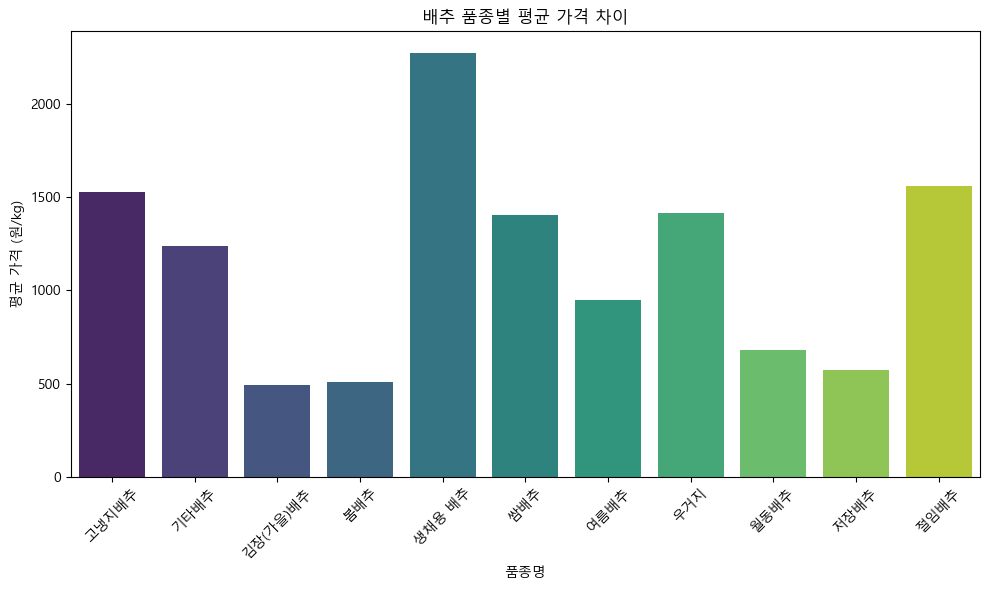

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


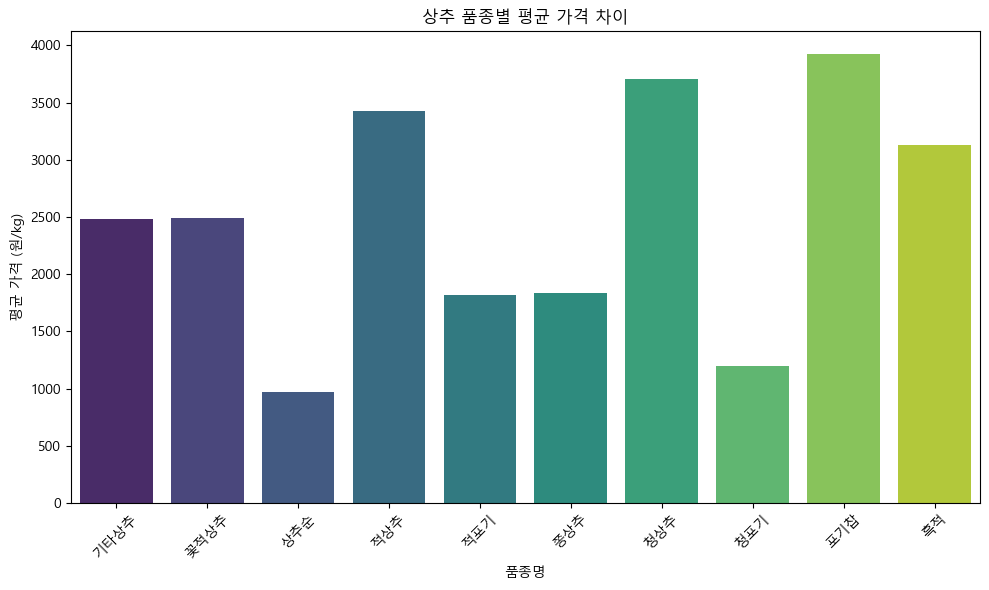

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


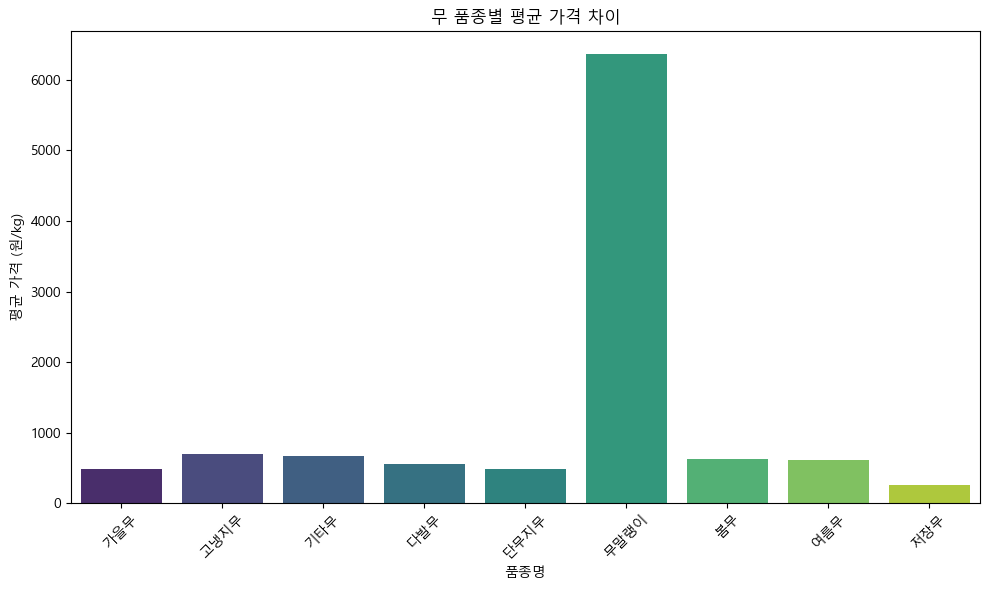

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


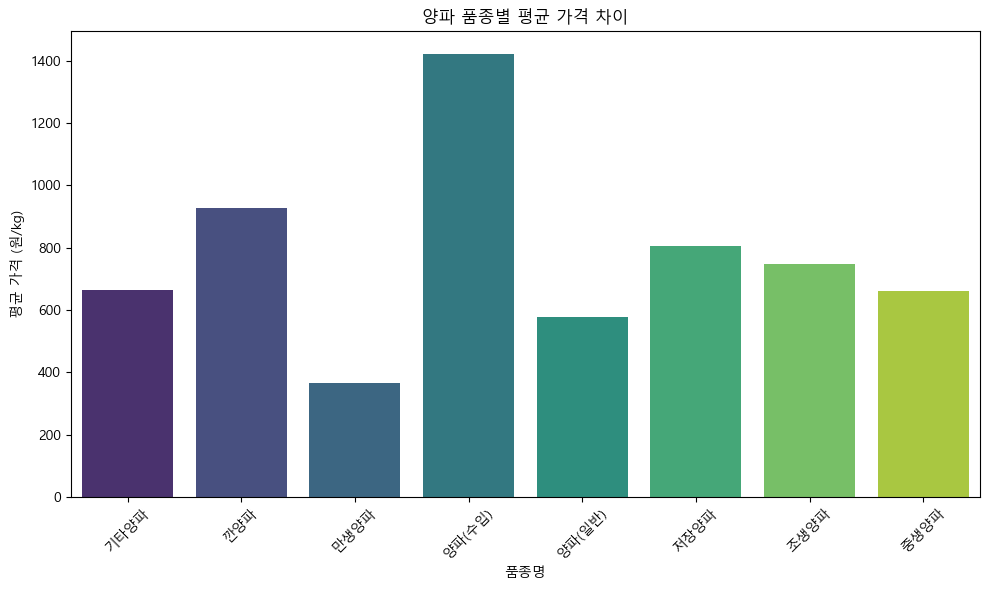

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


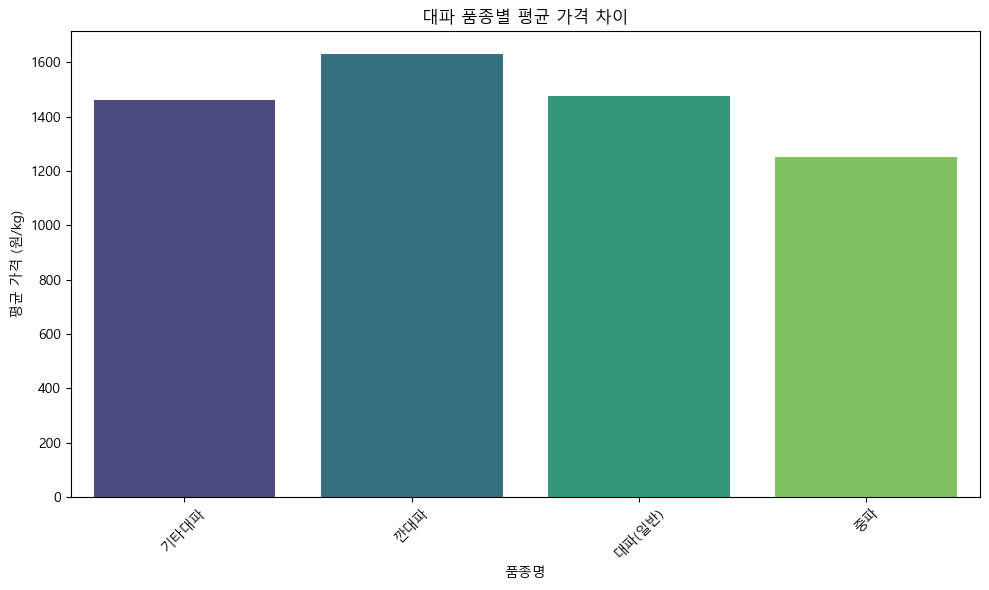

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


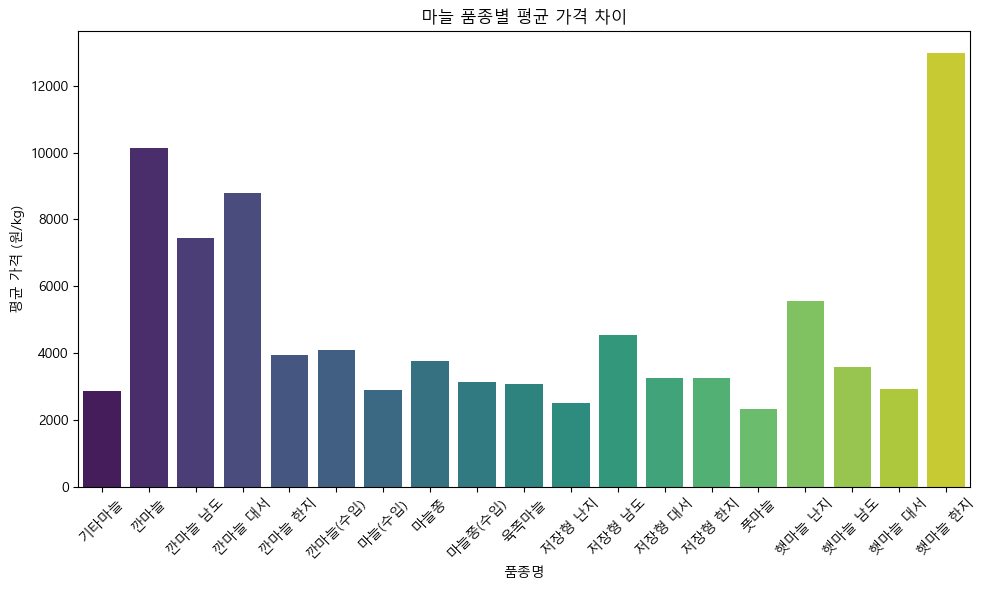

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\38479430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')


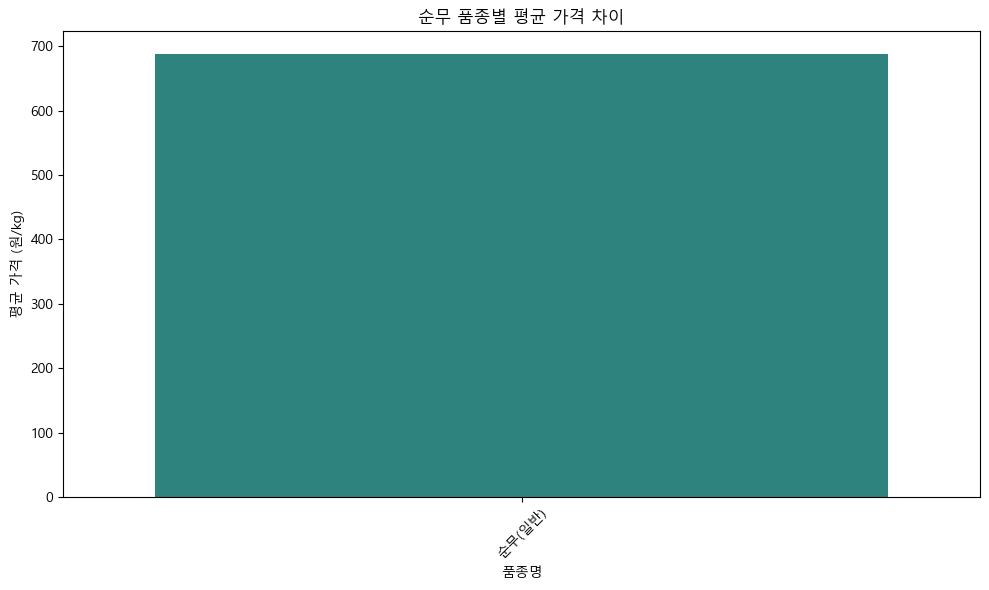

In [53]:
items = ['감자', '사과', '배', '배추', '상추', '무', '양파', '대파', '마늘', '순무']

# 각 품목에 대해 반복 시행
for item in items:
    # 특정 품목에 대한 데이터 필터링
    item_data = df[df['품목명'] == item]

    # 품종별 평균 가격 계산
    price_analysis = item_data.groupby('품종명')['평균가(원/kg)_산지'].mean().reset_index()

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'{item} 품종별 평균 가격 차이')
    plt.xlabel('품종명')
    plt.ylabel('평균 가격 (원/kg)')
    plt.tight_layout()
    plt.show()

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\1056527177.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', ax=axes[i], palette='viridis')
C:\Users\medici\AppData\Local\Temp\ipykernel_32148\1056527177.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', ax=axes[i], palette='viridis')
C:\Users\medici\AppData\Local\Temp\ipykernel_32148\1056527177.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산

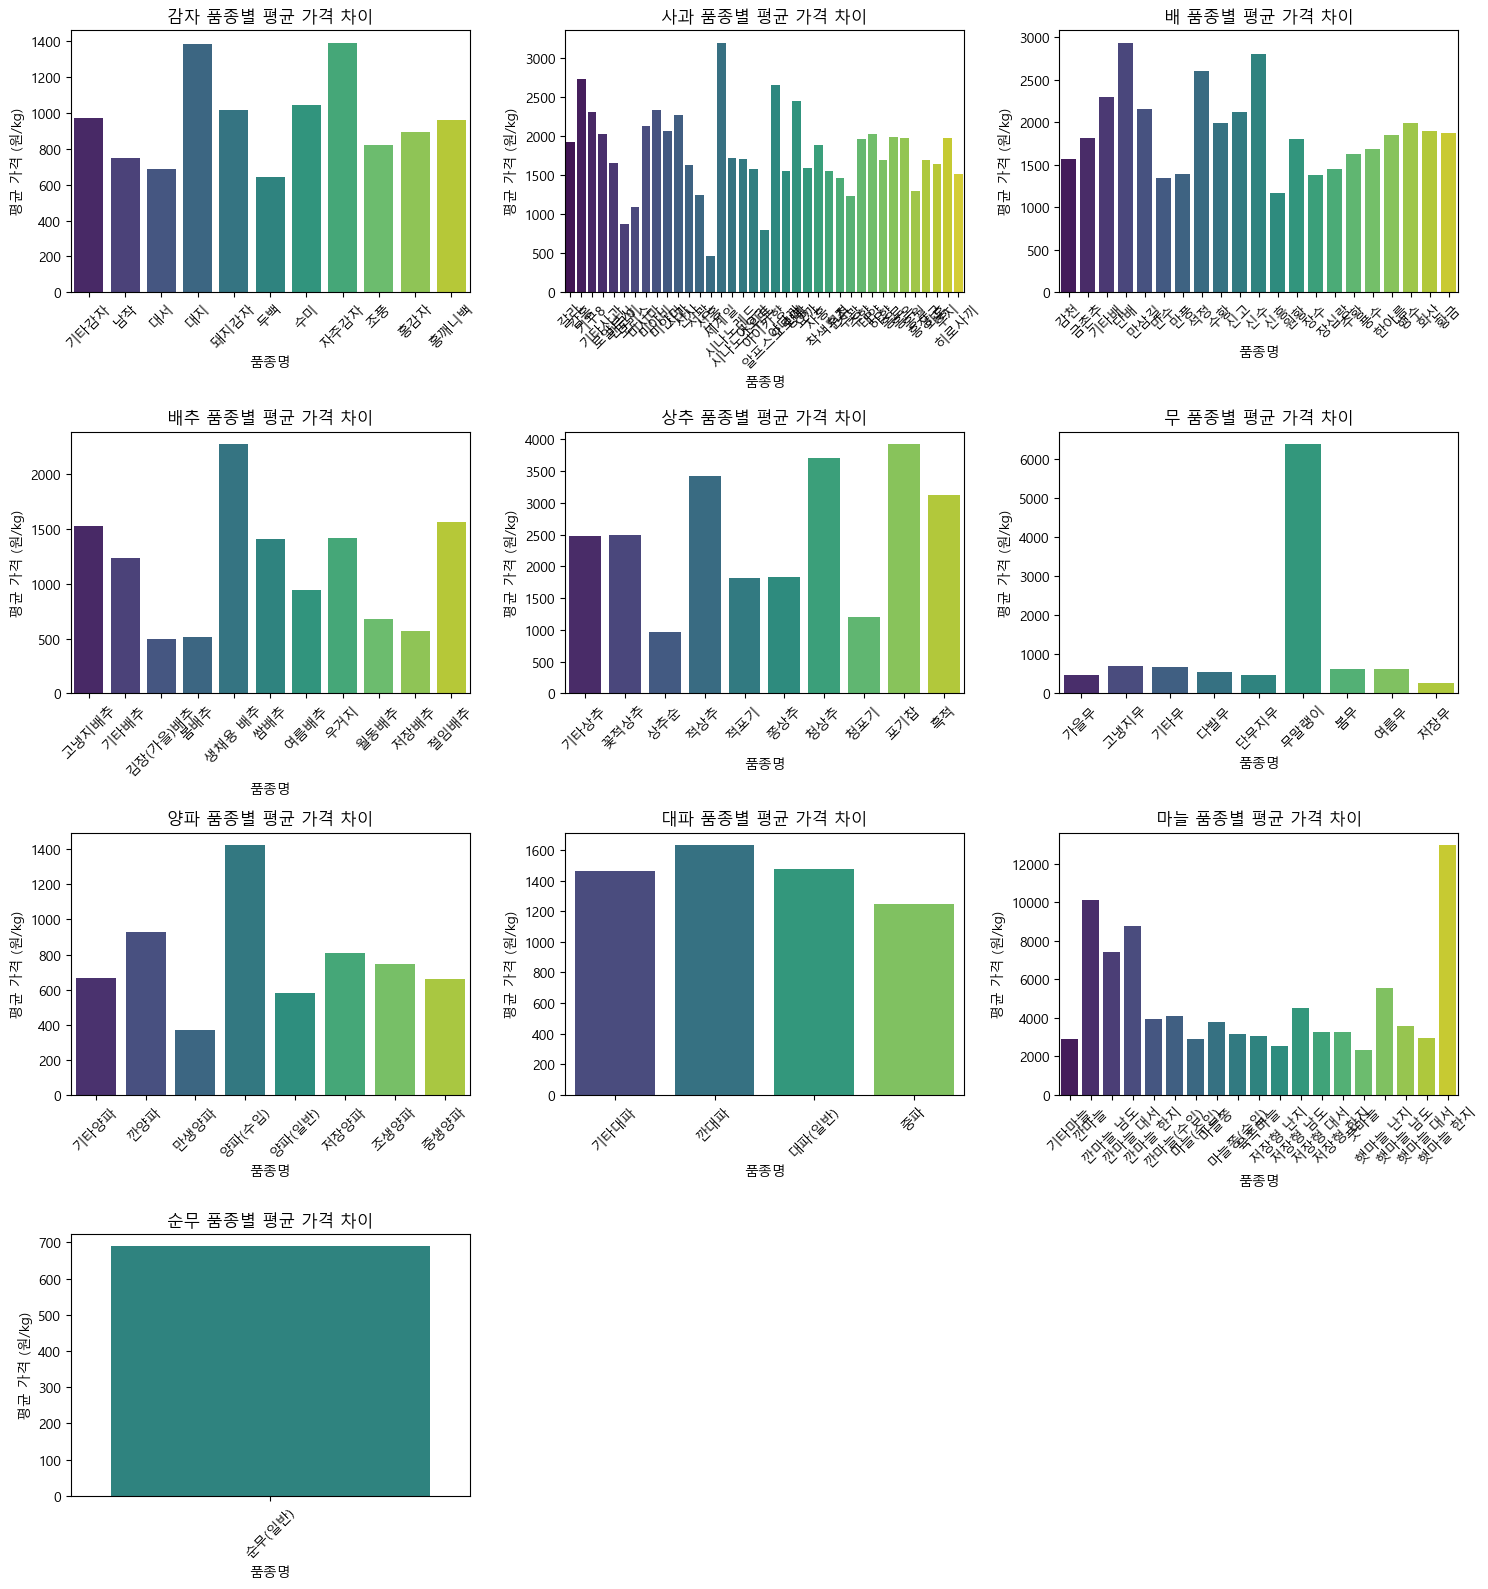

In [54]:
#서브플롯으로 한 페이지로
n_items = len(items)
cols = 3  # 한 행에 배치할 서브플롯 수
rows = (n_items // cols) + (n_items % cols > 0)  # 필요한 행 수 계산

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 각 품목에 대해 반복 시행
for i, item in enumerate(items):
    # 특정 품목에 대한 데이터 필터링
    item_data = df[df['품목명'] == item]

    # 품종별 평균 가격 계산
    price_analysis = item_data.groupby('품종명')['평균가(원/kg)_산지'].mean().reset_index()

    # 시각화
    sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_산지', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{item} 품종별 평균 가격 차이')
    axes[i].set_xlabel('품종명')
    axes[i].set_ylabel('평균 가격 (원/kg)')
    axes[i].tick_params(axis='x', rotation=45)

# 남은 서브플롯을 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


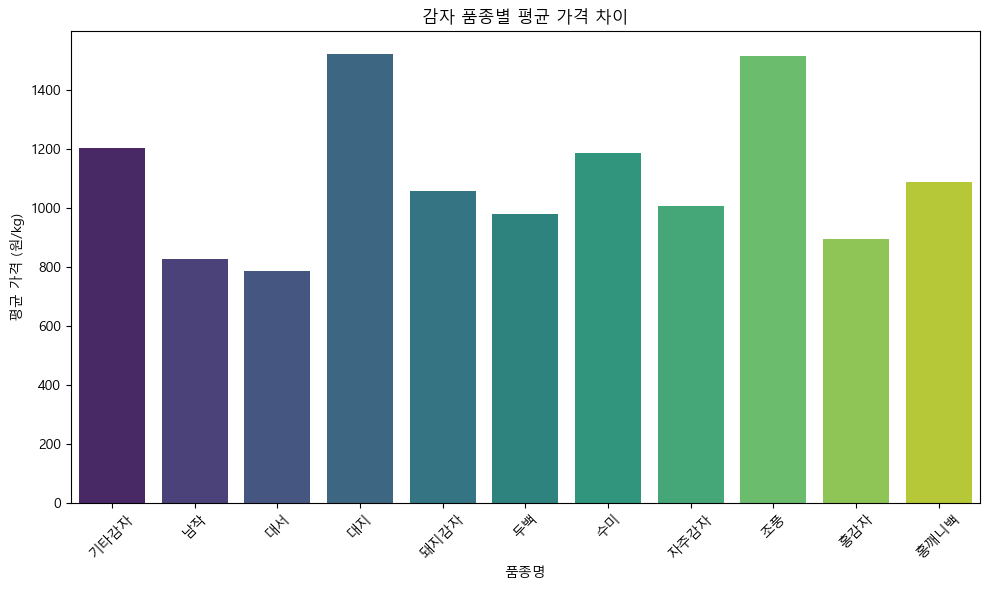

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


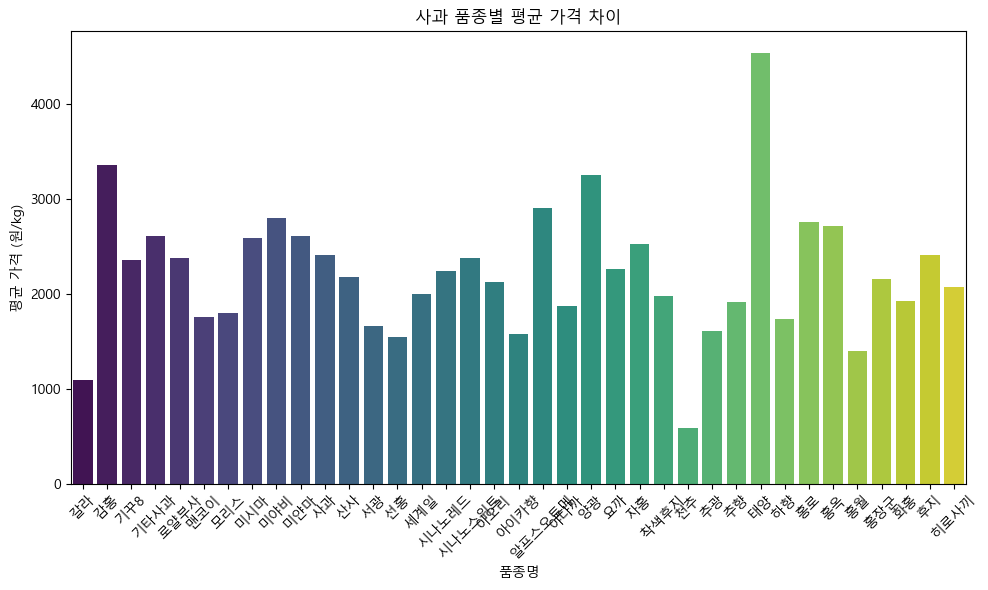

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


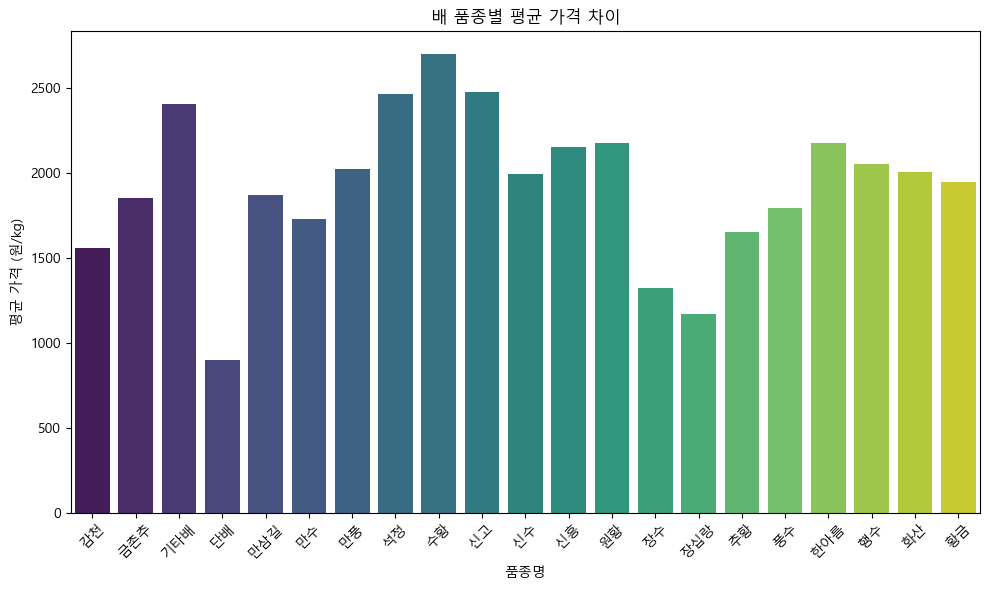

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


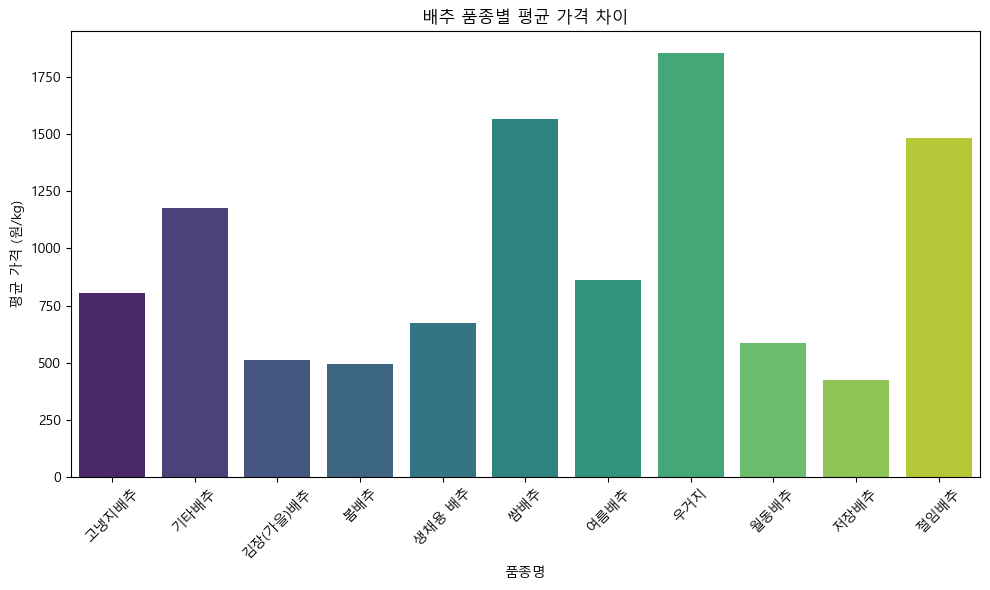

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


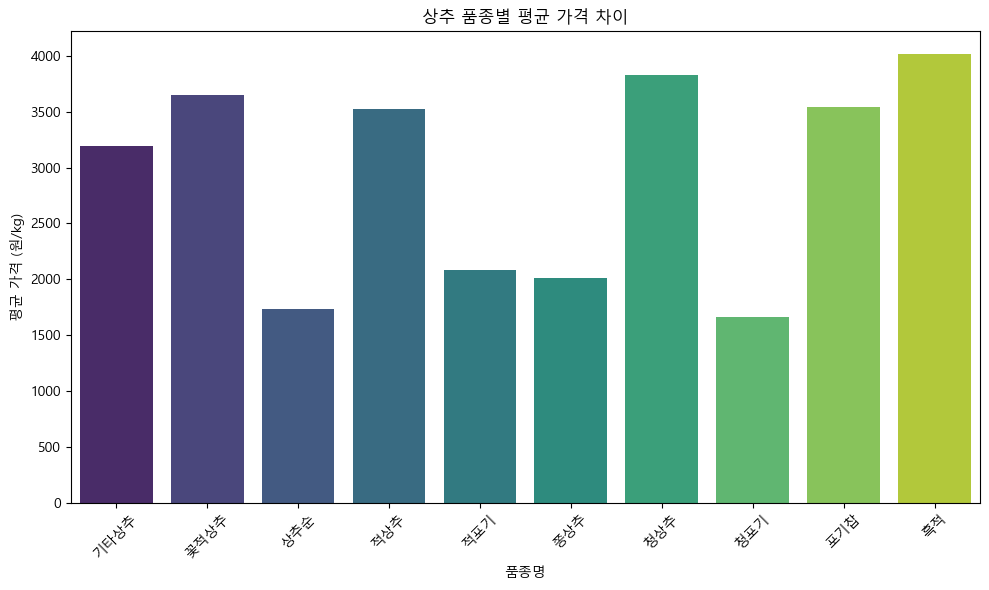

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


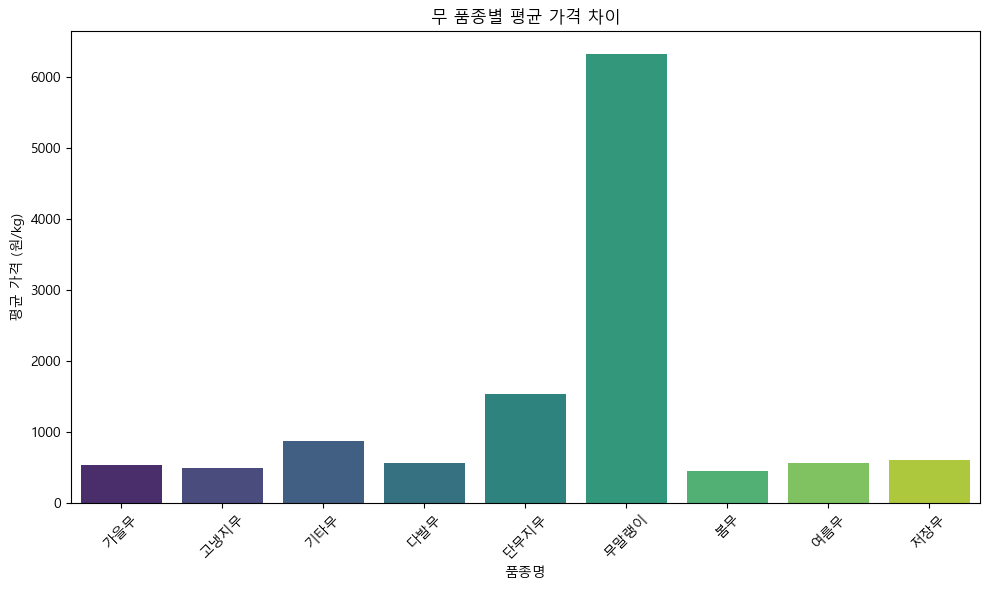

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


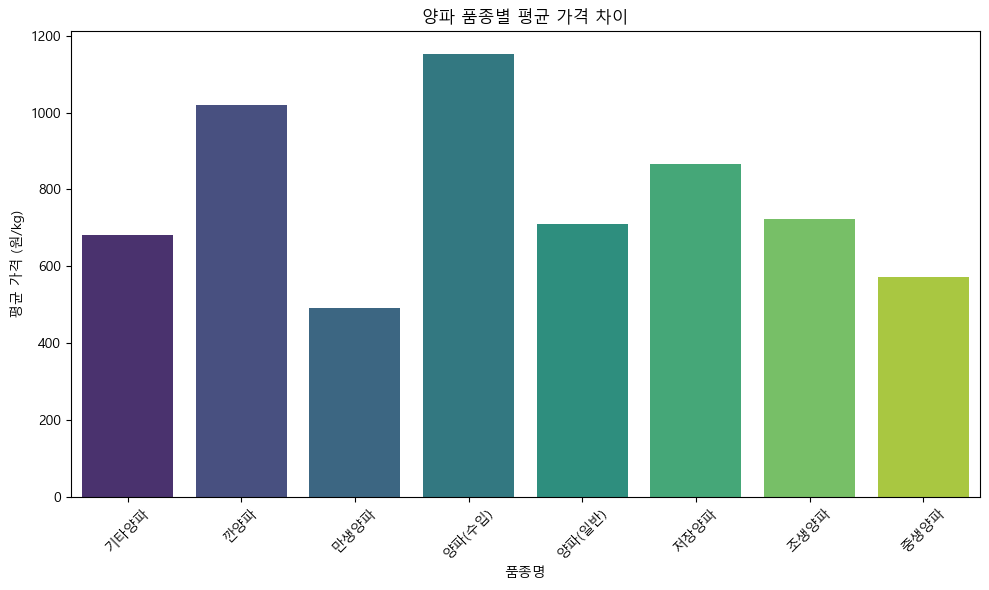

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


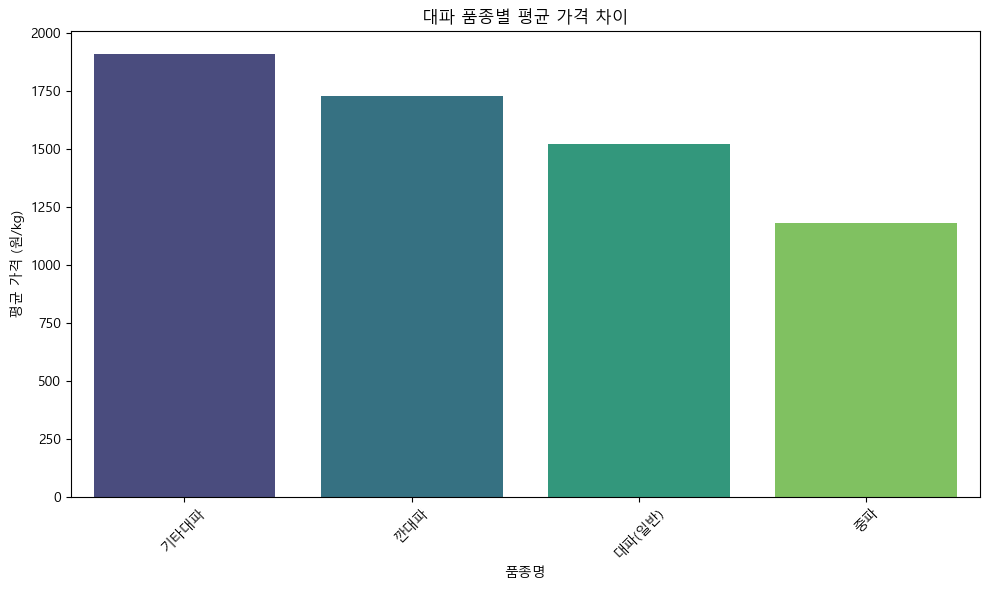

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


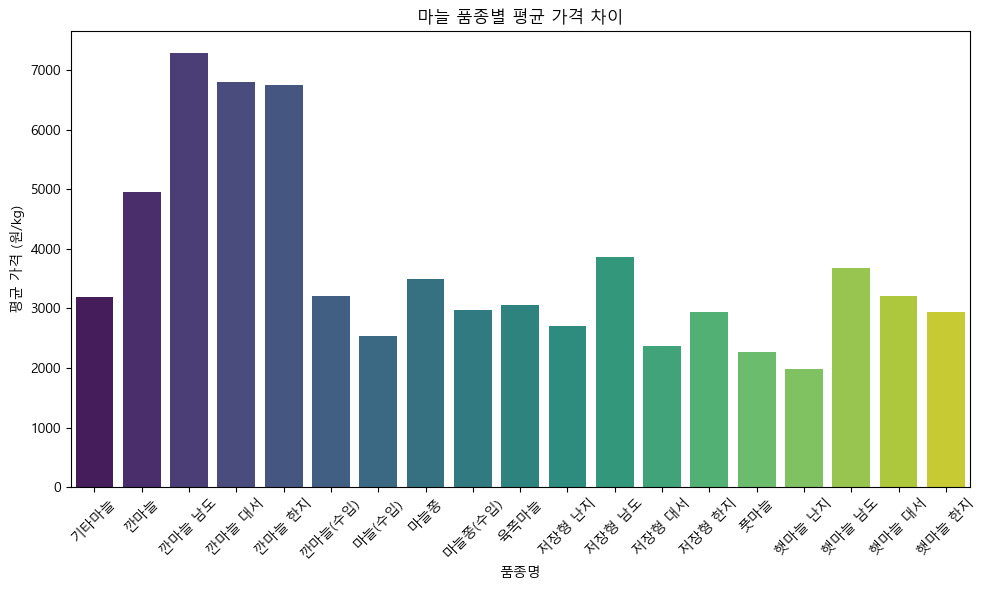

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3529820975.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')


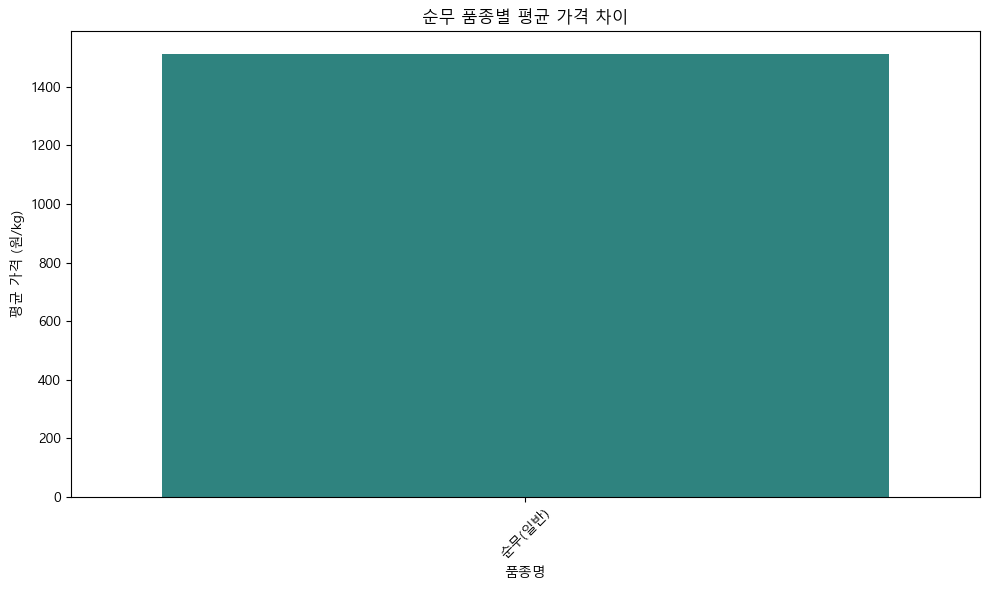

In [97]:
items = ['감자', '사과', '배', '배추', '상추', '무', '양파', '대파', '마늘', '순무']

# 각 품목에 대해 반복 시행
for item in items:
    # 특정 품목에 대한 데이터 필터링
    item_data = df[df['품목명'] == item]

    # 품종별 평균 가격 계산
    price_analysis = item_data.groupby('품종명')['평균가(원/kg)_도매'].mean().reset_index()

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'{item} 품종별 평균 가격 차이')
    plt.xlabel('품종명')
    plt.ylabel('평균 가격 (원/kg)')
    plt.tight_layout()
    plt.show()

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\1902587085.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', ax=axes[i], palette='viridis')
C:\Users\medici\AppData\Local\Temp\ipykernel_32148\1902587085.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', ax=axes[i], palette='viridis')
C:\Users\medici\AppData\Local\Temp\ipykernel_32148\1902587085.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도

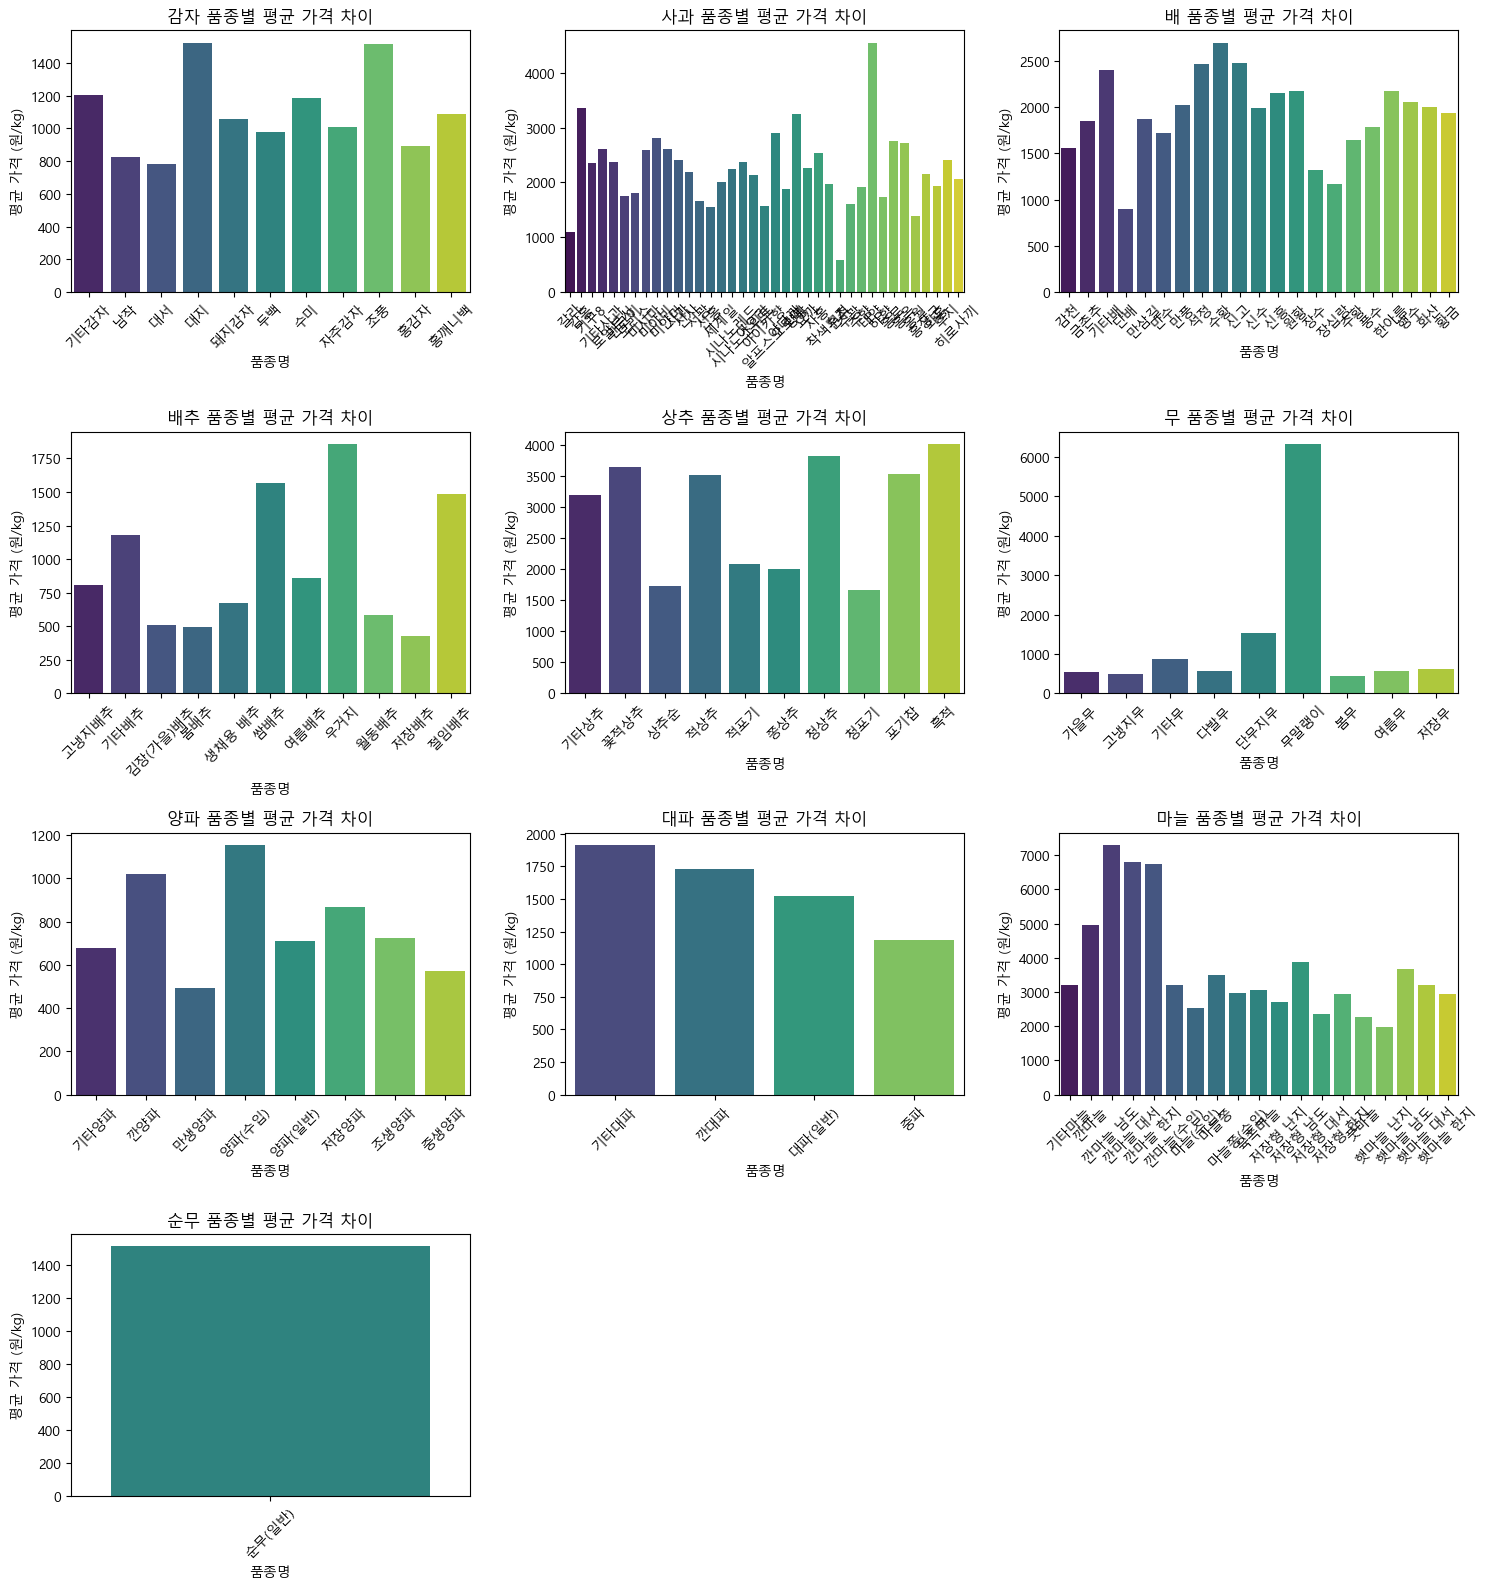

In [98]:
#서브플롯으로 한 페이지로
n_items = len(items)
cols = 3  # 한 행에 배치할 서브플롯 수
rows = (n_items // cols) + (n_items % cols > 0)  # 필요한 행 수 계산

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 각 품목에 대해 반복 시행
for i, item in enumerate(items):
    # 특정 품목에 대한 데이터 필터링
    item_data = df[df['품목명'] == item]

    # 품종별 평균 가격 계산
    price_analysis = item_data.groupby('품종명')['평균가(원/kg)_도매'].mean().reset_index()

    # 시각화
    sns.barplot(data=price_analysis, x='품종명', y='평균가(원/kg)_도매', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{item} 품종별 평균 가격 차이')
    axes[i].set_xlabel('품종명')
    axes[i].set_ylabel('평균 가격 (원/kg)')
    axes[i].tick_params(axis='x', rotation=45)

# 남은 서브플롯을 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 1차정리
- 순무를 제외하고, 작물들에 대한 품종이 많은 것을 확인함. 이에따라, 작물의 공급량, 가격차이를 확인 할 수 있었음.
- 시장에 가장 공급량이 많은 작물을 분석 할 것인가(대량 구매자),
- 시장에서 선호도가 높은 작물을 분석 할 것인가(개인 소비자)를 고려 할 필요가 있음.

In [57]:
df['시점'].unique()

array(['2018-01-01', '2018-01-11', '2018-01-21', '2018-02-01',
       '2018-02-11', '2018-02-21', '2018-03-01', '2018-03-11',
       '2018-03-21', '2018-04-01', '2018-04-11', '2018-04-21',
       '2018-05-01', '2018-05-11', '2018-05-21', '2018-06-01',
       '2018-06-11', '2018-06-21', '2018-07-01', '2018-07-11',
       '2018-07-21', '2018-08-01', '2018-08-11', '2018-08-21',
       '2018-09-01', '2018-09-11', '2018-09-21', '2018-10-01',
       '2018-10-11', '2018-10-21', '2018-11-01', '2018-11-11',
       '2018-11-21', '2018-12-01', '2018-12-11', '2018-12-21',
       '2019-01-01', '2019-01-11', '2019-01-21', '2019-02-01',
       '2019-02-11', '2019-02-21', '2019-03-01', '2019-03-11',
       '2019-03-21', '2019-04-01', '2019-04-11', '2019-04-21',
       '2019-05-01', '2019-05-11', '2019-05-21', '2019-06-01',
       '2019-06-11', '2019-06-21', '2019-07-01', '2019-07-11',
       '2019-07-21', '2019-08-01', '2019-08-11', '2019-08-21',
       '2019-09-01', '2019-09-11', '2019-09-21', '2019-

In [108]:
df['시점'] = pd.to_datetime(df['시점'])
df['계절'] = df['시점'].dt.month % 12 // 3 + 1  # 1: 봄, 2: 여름, 3: 가을, 4: 겨울

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3345044306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_price, x='계절', y='평균가', palette='viridis', ax=ax)
C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3345044306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_price, x='계절', y='평균가', palette='viridis', ax=ax)
C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3345044306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_price, x='계절', y='평균가', palette='viridis', ax=ax)
C:\Users\m

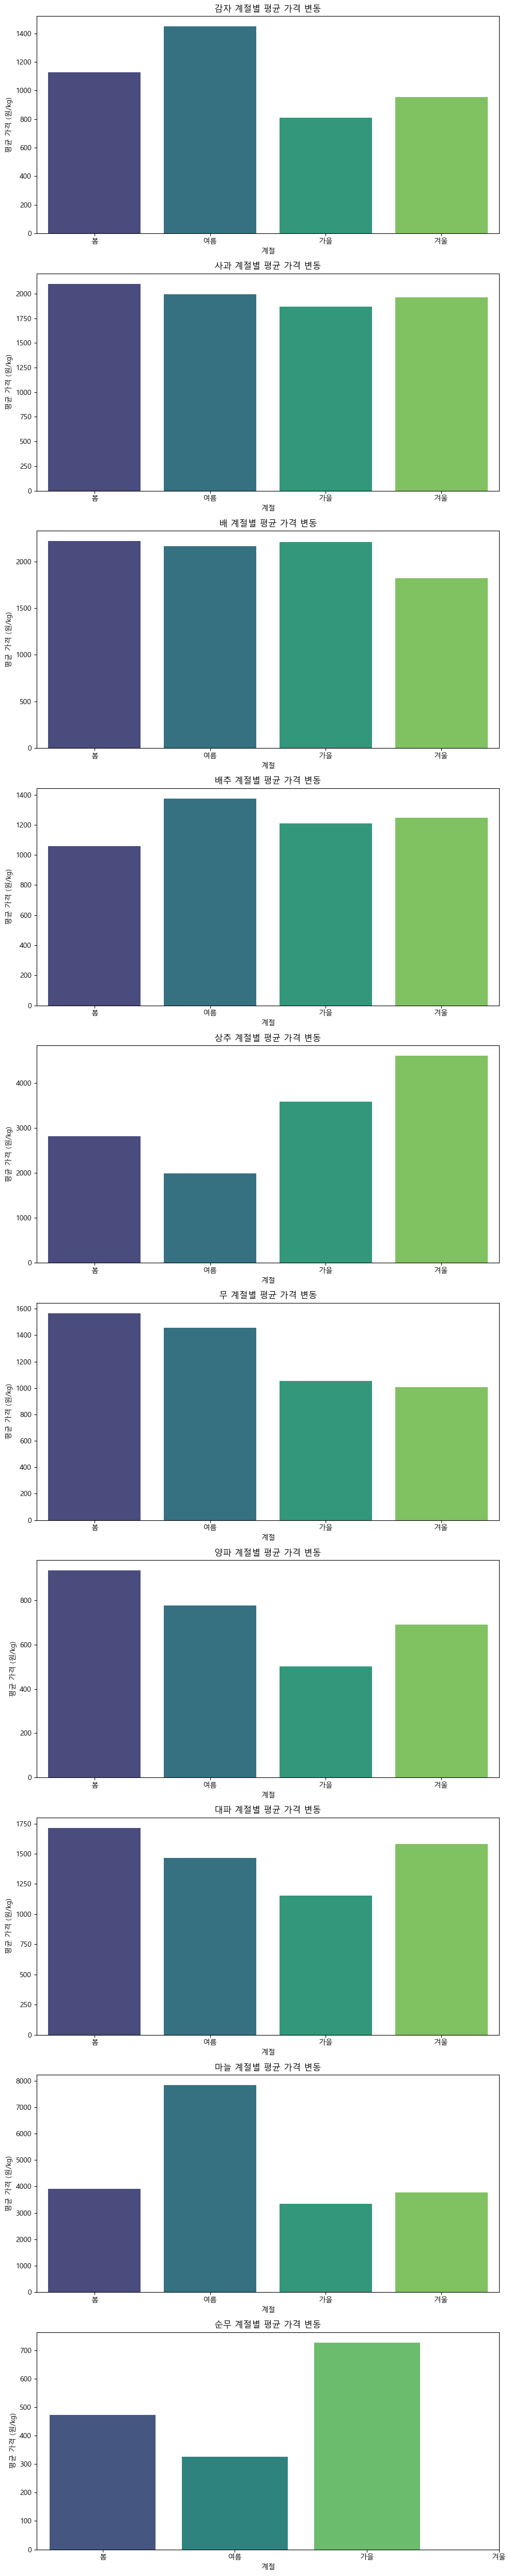

In [110]:
# 품목 리스트
items = ['감자', '사과', '배', '배추', '상추', '무', '양파', '대파', '마늘', '순무']

# 시각화를 위한 서브플롯 생성
fig, axes = plt.subplots(nrows=len(items), ncols=1, figsize=(10, 5 * len(items)))

# 각 품목에 대해 계절별 평균 가격 계산 및 시각화
for ax, item in zip(axes, items):
    seasonal_price = df[df['품목명'] == item].groupby(['계절']).agg(
        평균가=('평균가(원/kg)_산지', 'mean')
    ).reset_index()

    sns.barplot(data=seasonal_price, x='계절', y='평균가', palette='viridis', ax=ax)
    ax.set_title(f'{item} 계절별 평균 가격 변동')
    ax.set_xlabel('계절')
    ax.set_ylabel('평균 가격 (원/kg)')
    ax.set_xticks([0, 1, 2, 3])  # 0: 봄, 1: 여름, 2: 가을, 3: 겨울
    ax.set_xticklabels(['봄', '여름', '가을', '겨울'])

plt.tight_layout()
plt.show()

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3324410584.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_price, x='계절', y='평균가', palette='viridis', ax=ax)
C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3324410584.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_price, x='계절', y='평균가', palette='viridis', ax=ax)
C:\Users\medici\AppData\Local\Temp\ipykernel_32148\3324410584.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_price, x='계절', y='평균가', palette='viridis', ax=ax)
C:\Users\m

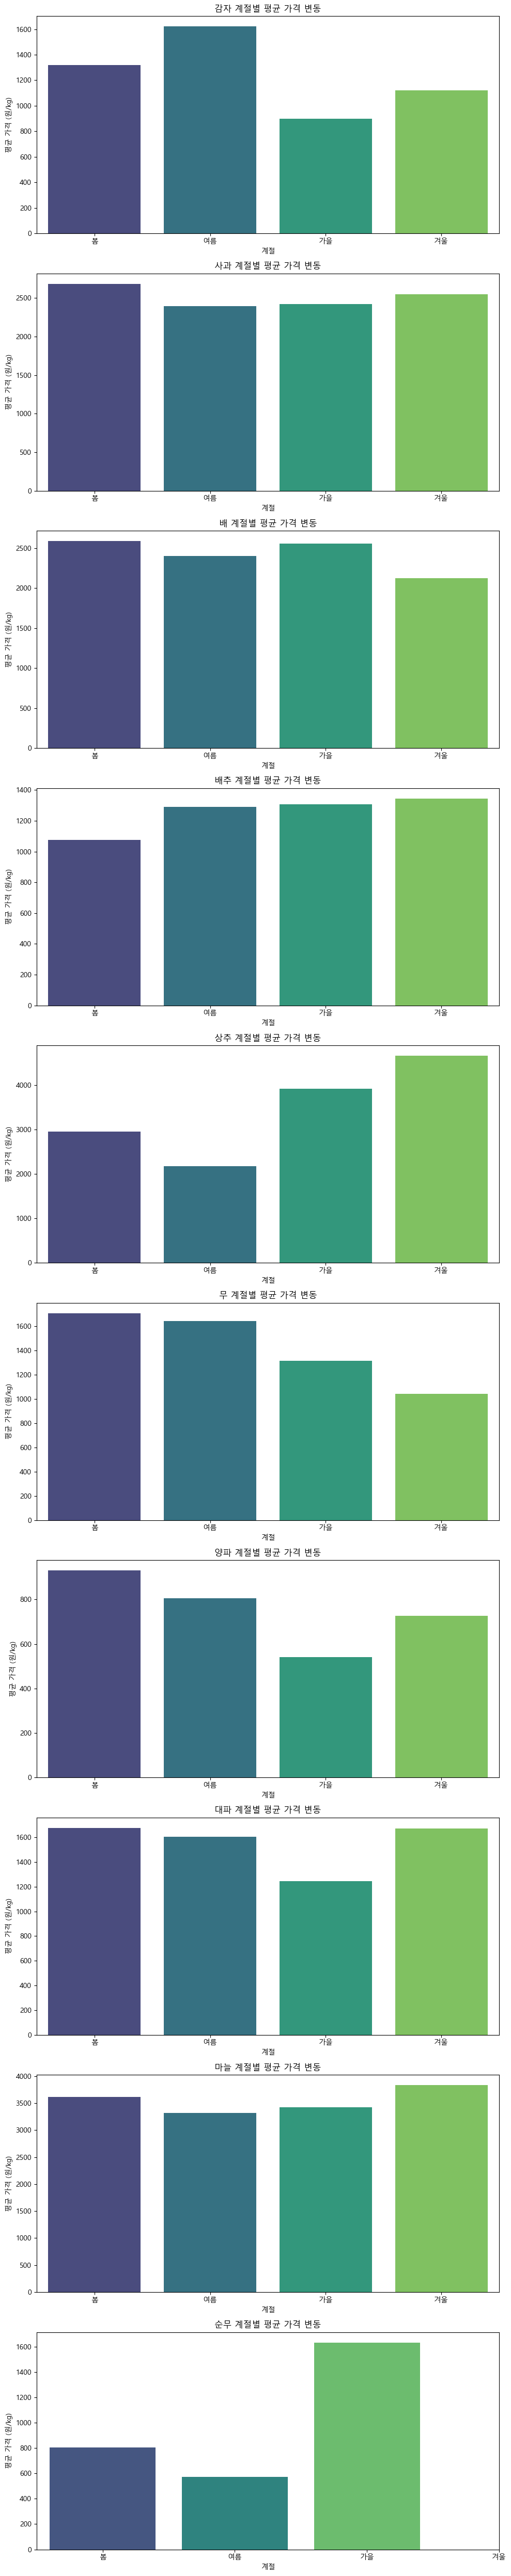

In [111]:
# 품목 리스트
items = ['감자', '사과', '배', '배추', '상추', '무', '양파', '대파', '마늘', '순무']

# 시각화를 위한 서브플롯 생성
fig, axes = plt.subplots(nrows=len(items), ncols=1, figsize=(10, 5 * len(items)))

# 각 품목에 대해 계절별 평균 가격 계산 및 시각화
for ax, item in zip(axes, items):
    seasonal_price = df[df['품목명'] == item].groupby(['계절']).agg(
        평균가=('평균가(원/kg)_도매', 'mean')
    ).reset_index()

    sns.barplot(data=seasonal_price, x='계절', y='평균가', palette='viridis', ax=ax)
    ax.set_title(f'{item} 계절별 평균 가격 변동')
    ax.set_xlabel('계절')
    ax.set_ylabel('평균 가격 (원/kg)')
    ax.set_xticks([0, 1, 2, 3])  # 0: 봄, 1: 여름, 2: 가을, 3: 겨울
    ax.set_xticklabels(['봄', '여름', '가을', '겨울'])

plt.tight_layout()
plt.show()

In [114]:
df.columns

Index(['시점', '공판장코드', '공판장명', '품목코드_산지', '품목명', '품종코드_산지', '품종명', '등급코드',
       '등급명', '총반입량(kg)_산지', '총거래금액(원)_산지', '평균가(원/kg)_산지', '중간가(원/kg)_산지',
       '최저가(원/kg)_산지', '최고가(원/kg)_산지', '경매_건수_산지',
       '전순_평균가격(원)_PreVious_SOON_산지', '전달_평균가격(원)_PreVious_MMonth_산지',
       '전년_평균가격(원)_PreVious_YeaR_산지', '평년_평균가격(원)_Common_Year_SOON_산지',
       '연도_산지', '시장코드', '시장명', '품목코드_도매', '품종코드_도매', '총반입량(kg)_도매',
       '총거래금액(원)_도매', '평균가(원/kg)_도매', '고가(20%)_평균가', '중가(60%)_평균가_',
       '저가(20%)_평균가', '중간가(원/kg)_도매', '최저가(원/kg)_도매', '최고가(원/kg)_도매',
       '경매_건수_도매', '전순_평균가격(원)_PreVious_SOON_도매',
       '전달_평균가격(원)_PreVious_MMonth_도매', '전년_평균가격(원)_PreVious_YeaR_도매',
       '평년_평균가격(원)_Common_Year_SOON_도매', '연도_도매', '계절', '분기'],
      dtype='object')

C:\Users\medici\AppData\Local\Temp\ipykernel_32148\1184513408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=potato_seasonal_auction_count, x='계절', y='경매건수', palette='viridis')


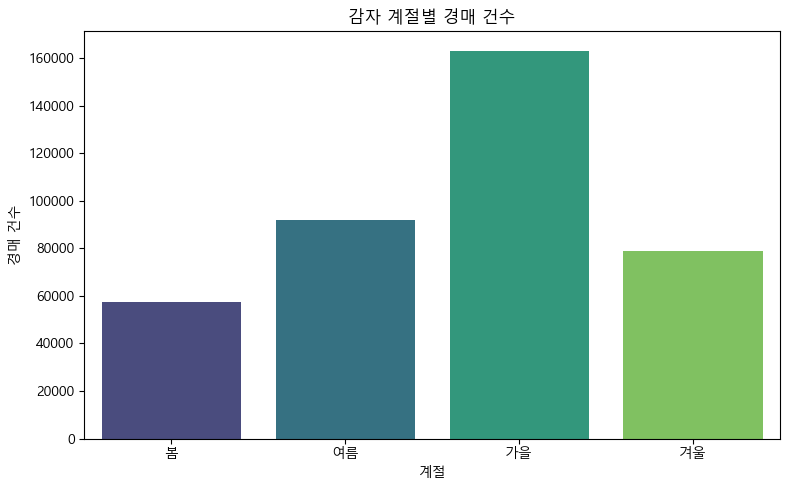

In [118]:
potato_seasonal_auction_count = df[df['품목명'] == '감자'].groupby('계절').size().reset_index(name='경매건수')

# 감자 계절별 경매 건수 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=potato_seasonal_auction_count, x='계절', y='경매건수', palette='viridis')
plt.title('감자 계절별 경매 건수')
plt.xlabel('계절')
plt.ylabel('경매 건수')
plt.xticks(ticks=[0,1,2,3], labels=['봄', '여름', '가을', '겨울'])
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 독립 변수(X)와 종속 변수(y)
X = df[['총반입량(kg)_산지', '총거래금액(원)_산지',\
        '중간가(원/kg)_산지', '최저가(원/kg)_산지', '최고가(원/kg)_산지', '경매 건수_산지',\
              '전순 평균가격(원) PreVious SOON_산지', '전달 평균가격(원) PreVious MMonth_산지', '전년 평균가격(원) PreVious YeaR_산지', '평년 평균가격(원) Common Year SOON_산지']]
y = df['평균가(원/kg)_산지']


Mean Squared Error: 203.47486636407248
R-squared: 0.9997195717671975


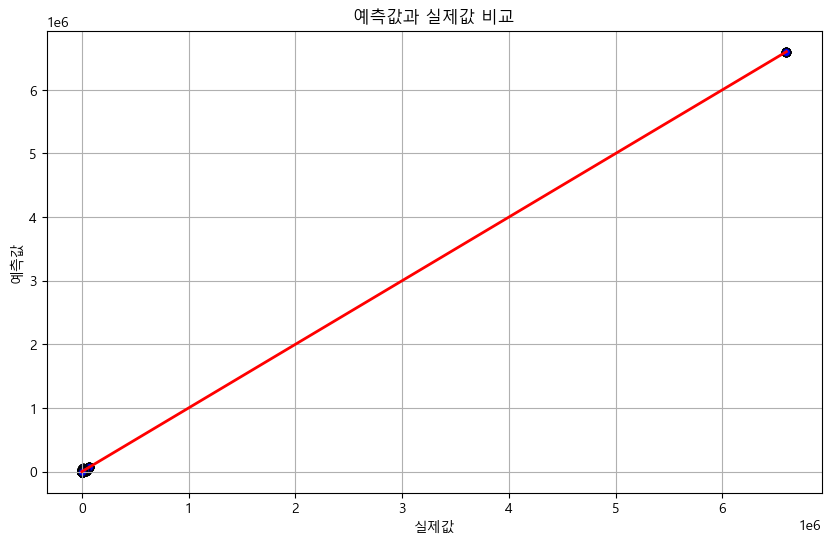

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# 독립 변수(X)와 종속 변수(y)
X = df[['총반입량(kg)_산지', '총거래금액(원)_산지',
        '중간가(원/kg)_산지', '최저가(원/kg)_산지', '최고가(원/kg)_산지', '경매 건수_산지',
        '전순 평균가격(원) PreVious SOON_산지', '전달 평균가격(원) PreVious MMonth_산지', 
        '전년 평균가격(원) PreVious YeaR_산지', '평년 평균가격(원) Common Year SOON_산지']]
y = df['평균가(원/kg)_산지']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)

# 성능 평가
mse = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('예측값과 실제값 비교')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.grid(True)
plt.show()


In [29]:
# 평균오차제곱의 크기가 너무 큼.(25만원)
# 결정계수는 매우 높은수준임.
# 이상치로 인해 모델의 결과를 신뢰하기 어려움.
# 이상치 제거 및 스케일링, 정규화를 통해서 MSE를 낮추고자 함.

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
predictions = model.predict(X_test_scaled)

# 모델 평가
mse = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
#_-

Mean Squared Error: 203.474866364076
R-squared: 0.9997195717671975


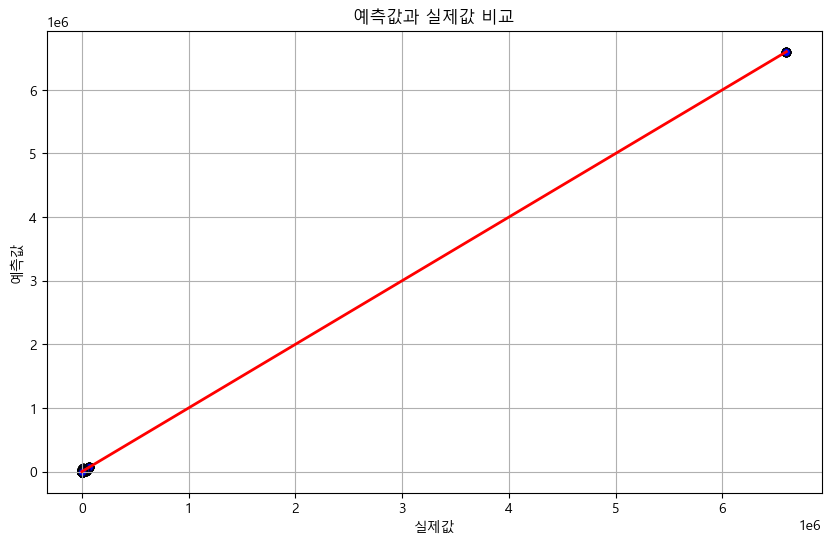

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('예측값과 실제값 비교')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 고객 데이터 예시 생성
# 예시로 4개의 특성(연령, 연간 지출, 구매 빈도, 인터넷 사용 시간) 생성
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 70, size=100),
    'Annual Spending': np.random.randint(1000, 20000, size=100),
    'Purchase Frequency': np.random.randint(1, 10, size=100),
    'Internet Usage': np.random.randint(0, 24, size=100)
}
df = pd.DataFrame(data)

# 2. PCA로 차원 축소
pca = PCA(n_components=2)  # 2차원으로 축소
reduced_data = pca.fit_transform(df)

# 3. KMeans 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(reduced_data)

# 4. 클러스터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Customer Segmentation with PCA and KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
